#### Canada Census Assignment

Goal is to find the subset of dempgraphic characteristics that can best predict the median household income for CTs 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

pd.set_option('mode.chained_assignment', None)

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import plotly.express as px
from sklearn.preprocessing import StandardScaler

In [3]:
def QuickView(df):
    '''
    # Quick Data View Function to show columns, nulls,type and missing percentage in a dataframe",
    '''
    # Number of Null values for each column
    Nnull = pd.DataFrame(data=df.isnull().sum(), columns=['Nnull'])

    # Number of Unique Values for each column\
    Nunique = pd.DataFrame(data=df.nunique(), columns=['Nunique'])
    Nunique['Total Rows'] = df.shape[0]
    
    # Dtype for each column
    Dtype = pd.DataFrame(data=df.dtypes, columns=['Dtype'])
  
    # MissingRate for each column
    MissingRate = pd.DataFrame(data = df.isnull().sum()/df.shape[0], columns=['MissingRate'])
    
    #Sample
    SampleValue = pd.DataFrame(data= df.sample().sum(), columns = ['Sample'])
    
    # Descriptive stats for numerical columns
    Des = pd.DataFrame(data = df.describe().T)

    # Add more here, if you want to have quickview before you access to the further analysis\n",
    #Concat all columns you want
    
    DataQuickview = pd.concat([Nnull,Nunique,MissingRate, Dtype, SampleValue], axis = 1)
     # Object volumns don't have a description
    DataQuickview = DataQuickview.replace(np.nan,'na')
    return pd.DataFrame(DataQuickview)

In [4]:
def CreateCorrelationHeatmap(correl_dataframe, cmap ='cividis'):
    df_Correlation = correl_dataframe
    fig = plt.figure()
    # Create heatmap subplot  
    plot_axes= fig.add_subplot(111) 
    heatmap = plot_axes.matshow(df_Correlation, vmin=-1, vmax=1, cmap=cmap)
    # Add a colorbaron the right based on the heatmap
    fig.colorbar(heatmap, fraction=0.046, pad=0.04)
    # Create labels with column names
    ticks = np.arange(0, df_Correlation.columns.size, 1) # create a numpyarray from 0 to column size
    plot_axes.set_xticks(ticks)
    plot_axes.set_yticks(ticks)
    plot_axes.set_yticklabels(df_Correlation.columns.values)
    plot_axes.set_xticklabels(df_Correlation.columns.values, rotation=90)
    # Set size
    fig.set_size_inches((6,6))
    # Show plot
    plt.show()

#### Data Dictionary

| Source | Column Name |
|--------|-------------|
| Basics | Total Population |
| Basics | Total Households |
| Households by Income (Current Year) | `Median Household Income (Current Year $)` |
| Occupied Private Dwellings by Period of Construction | Total Households For Period Of Construction 
| Occupied Private Dwellings by Period of Construction | Total Households For Period Of Construction  Built Before 1961 |
| Occupied Private Dwellings by Period of Construction | Total Households For Period Of Construction  Built Between 1961 And 1980 |
| Occupied Private Dwellings by Period of Construction | Total Households For Period Of Construction  Built Between 1981 And 1990 |
| Occupied Private Dwellings by Period of Construction | Total Households For Period Of Construction  Built Between 1991 And 2000 |
| Occupied Private Dwellings by Period of Construction | Total Households For Period Of Construction  Built Between 2001 And 2005 |
| Occupied Private Dwellings by Period of Construction | Total Households For Period Of Construction  Built Between 2006 And 2010 |
| Occupied Private Dwellings by Period of Construction | Total Households For Period Of Construction  Built Between 2011 And 2015 |
| Occupied Private Dwellings by Period of Construction | Total Households For Period Of Construction  Built Between 2016 And 2021 |
| Occupied Private Dwellings by Structure Type | Total Households For Structure Type  Houses |
| Occupied Private Dwellings by Structure Type | Total Households For Structure Type  Apartment, Building Low And High Rise |
| Occupied Private Dwellings by Structure Type | Total Households For Structure Type  Other Dwelling Types |
| Occupied Private Dwellings by Tenure | Total Households for Tenure |
| Occupied Private Dwellings by Tenure | Owner |
| Occupied Private Dwellings by Tenure | Renter |

### Importing Data

In [5]:
df = pd.read_csv('CensusCanada2021Training.csv')

#renaming
colnames = [col.replace('Total Households For Period Of Construction Built', 'household_built') for col in df.columns]
colnames = [col.replace(' ', "").replace(',', '_').replace('$', 'Dollar') for col in colnames]
colnames = [col.replace('TotalHouseholdsForStructureType', "Structure_") for col in colnames]
df.columns = colnames

# reordering it
income_col = 'MedianHouseholdIncome(CurrentYearDollar)'
colnames.remove(income_col)
colnames.append(income_col)
df= df[colnames]

QuickView(df)

,Nnull,Nunique,Total Rows,MissingRate,Dtype,Sample
TotalPopulation,0,3733,5371,0.000000,int64,4493.0
TotalHouseholds,74,819,5371,0.013778,float64,2005.0
TotalHouseholdsForPeriodOfConstruction,74,819,5371,0.013778,float64,2005.0
household_builtBefore1961,74,337,5371,0.013778,float64,1445.0
household_builtBetween1961And1980,74,365,5371,0.013778,float64,345.0
household_builtBetween1981And190,74,249,5371,0.013778,float64,75.0
household_builtBetween1991And2000,74,250,5371,0.013778,float64,70.0
household_builtBetween2001And2005,74,206,5371,0.013778,float64,0.0
household_builtBetween2006And2010,74,221,5371,0.013778,float64,20.0
household_builtBetween2011And2015,74,235,5371,0.013778,float64,15.0


#### Analyzing Missing Rows

In [6]:
df_1 = df[['TotalHouseholdsforTenure','DwellingsbyTenureOwner', 'DwellingsbyTenureRenter' ]]
df_1['ManualSum'] = df_1.DwellingsbyTenureOwner + df_1.DwellingsbyTenureRenter
df_1['SumEqualTotalHousehold'] = np.where(df_1.ManualSum == df_1.TotalHouseholdsforTenure, 1, 0)

In [7]:
display(df_1.sample(5, random_state=42))
# The total household is not equal to the sum

df_1.SumEqualTotalHousehold.value_counts(normalize=True)
# Only half of it is the same

,TotalHouseholdsforTenure,DwellingsbyTenureOwner,DwellingsbyTenureRenter,ManualSum,SumEqualTotalHousehold
410,1105.0,740.0,365.0,1105.0,1
3625,3955.0,1635.0,2325.0,3960.0,0
838,290.0,120.0,170.0,290.0,1
4080,2400.0,1575.0,825.0,2400.0,1
4573,1375.0,360.0,1010.0,1370.0,0


SumEqualTotalHousehold
1    0.546081
0    0.453919
Name: proportion, dtype: float64

In [8]:
# Let's take a look at which indeces are missing?
missing_dict = {}
for col in df.columns:
    missing_dict[col]= df[df[col].isnull()].index.tolist()


In [9]:
# Are the same 74 rows missing data?

cols_missing74  = ['TotalHouseholds',
       'TotalHouseholdsForPeriodOfConstruction', 'household_builtBefore1961',
       'household_builtBetween1961And1980', 'household_builtBetween1981And190',
       'household_builtBetween1991And2000',
       'household_builtBetween2001And2005',
       'household_builtBetween2006And2010',
       'household_builtBetween2011And2015',
       'household_builtBetween2016And2021',
       'DwellingsbyTenureOwner', 'DwellingsbyTenureRenter']

df_temp = pd.DataFrame()
for col in cols_missing74:
    df_temp[col] = missing_dict[col]
    #print(col + ' is missing in row num: \n', missing_dict[col])

df_temp['SameValue'] = (df_temp.T.nunique() == 1).tolist()

display(df_temp.head(5))
#Each col shows the index where the colname is missing. 
#We see that row 71 is missing for Totak=lHouseholds, household_builtBefore1961...
# indicating a problematic row entirely

df_temp.SameValue.value_counts()
# all 74 rows are missing each col data

,TotalHouseholds,TotalHouseholdsForPeriodOfConstruction,household_builtBefore1961,household_builtBetween1961And1980,household_builtBetween1981And190,household_builtBetween1991And2000,household_builtBetween2001And2005,household_builtBetween2006And2010,household_builtBetween2011And2015,household_builtBetween2016And2021,DwellingsbyTenureOwner,DwellingsbyTenureRenter,SameValue
0,71,71,71,71,71,71,71,71,71,71,71,71,True
1,180,180,180,180,180,180,180,180,180,180,180,180,True
2,233,233,233,233,233,233,233,233,233,233,233,233,True
3,639,639,639,639,639,639,639,639,639,639,639,639,True
4,654,654,654,654,654,654,654,654,654,654,654,654,True


SameValue
True    74
Name: count, dtype: int64

In [10]:
MissingRowsforHousehold = missing_dict['TotalHouseholds']
MissingRowsforMedianIncome = missing_dict['MedianHouseholdIncome(CurrentYearDollar)']

# Find the rows that are in TotalHouseholds but not in MedianHouseholdIncome
rows_not_in_median_income = list(set(MissingRowsforHousehold) - set(MissingRowsforMedianIncome))
rows_not_in_household_income = list(set(MissingRowsforMedianIncome) - set(MissingRowsforHousehold))

# Print the result
print("Rows in 'TotalHouseholds' but not in 'MedianHouseholdIncome':\n", rows_not_in_median_income)
print(f"\n\nRows in 'MedianHouseholdIncome' but not in 'TotalHouseholds':\nTotal: {len(rows_not_in_household_income)}\n", rows_not_in_household_income)



Rows in 'TotalHouseholds' but not in 'MedianHouseholdIncome':
 []


Rows in 'MedianHouseholdIncome' but not in 'TotalHouseholds':
Total: 52
 [2185, 4492, 4237, 5004, 143, 2191, 2451, 533, 4630, 3222, 1943, 4633, 3097, 4763, 5276, 1821, 1949, 3618, 4258, 4133, 3750, 1831, 2855, 4393, 4395, 4784, 305, 1079, 439, 5305, 1730, 1222, 970, 3403, 2259, 3411, 5080, 2139, 2908, 4317, 2397, 3547, 4193, 3173, 3049, 1259, 236, 368, 3058, 4600, 4988, 2687]


- Does it make sense to impute census data?
- The whole point is that each area has their own fluctuation, 
- using a default value might be counter productive

In [11]:
# We find that the 74 rows missing from the dwellings data 
# are a subset of 126 missing data from Median Household income.

# For now, I'll drop all of the 126 missing data

df_data = df.dropna()

# we now see no missing data
QuickView(df_data)

,Nnull,Nunique,Total Rows,MissingRate,Dtype,Sample
TotalPopulation,0,3669,5245,0.0,int64,3773.0
TotalHouseholds,0,803,5245,0.0,float64,1430.0
TotalHouseholdsForPeriodOfConstruction,0,803,5245,0.0,float64,1430.0
household_builtBefore1961,0,337,5245,0.0,float64,225.0
household_builtBetween1961And1980,0,365,5245,0.0,float64,950.0
household_builtBetween1981And190,0,249,5245,0.0,float64,150.0
household_builtBetween1991And2000,0,250,5245,0.0,float64,55.0
household_builtBetween2001And2005,0,206,5245,0.0,float64,10.0
household_builtBetween2006And2010,0,221,5245,0.0,float64,20.0
household_builtBetween2011And2015,0,235,5245,0.0,float64,15.0


#### Make a correlation heatmap

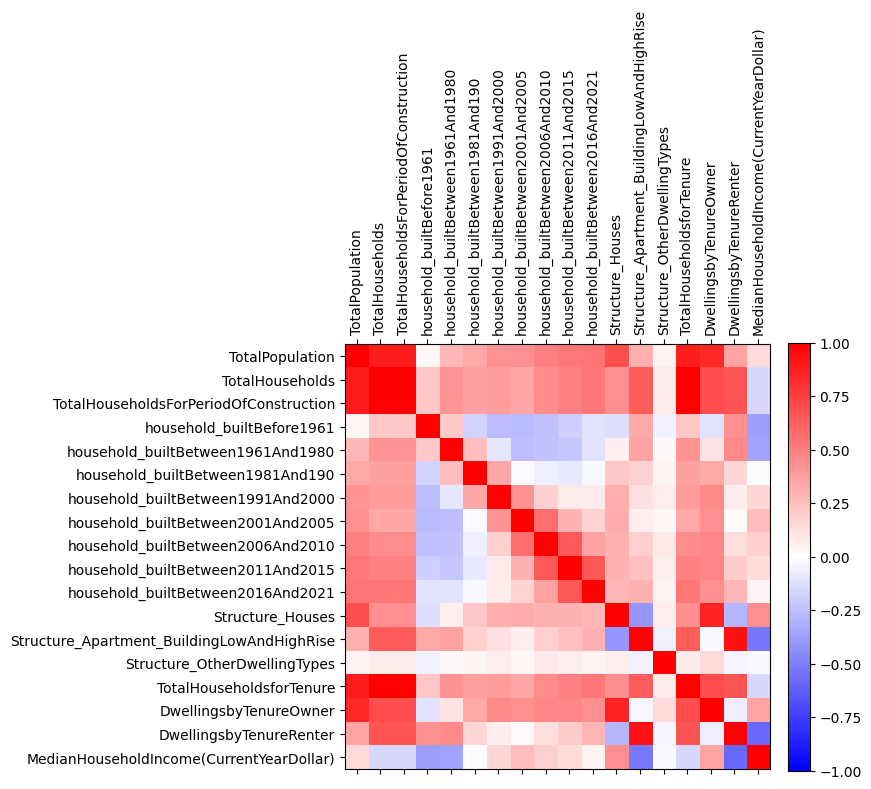

In [12]:
df_Correlation = df_data.corr('pearson')

# looking at all correlation
CreateCorrelationHeatmap(correl_dataframe= df_Correlation, cmap= 'bwr')

In [13]:
df_Correlation['MedianHouseholdIncome(CurrentYearDollar)'].sort_values()

DwellingsbyTenureRenter                      -0.584392
Structure_Apartment_BuildingLowAndHighRise   -0.529359
household_builtBefore1961                    -0.375231
household_builtBetween1961And1980            -0.360113
TotalHouseholds                              -0.151463
TotalHouseholdsForPeriodOfConstruction       -0.151463
TotalHouseholdsforTenure                     -0.151463
Structure_OtherDwellingTypes                 -0.023575
household_builtBetween1981And190             -0.014824
household_builtBetween2016And2021             0.047887
household_builtBetween2011And2015             0.135797
TotalPopulation                               0.147750
household_builtBetween1991And2000             0.162637
household_builtBetween2006And2010             0.189092
household_builtBetween2001And2005             0.261903
DwellingsbyTenureOwner                        0.358097
Structure_Houses                              0.443159
MedianHouseholdIncome(CurrentYearDollar)      1.000000
Name: Medi

#### We can choose to handle highly correlated columns by normalizing and creating new columns


In [14]:
df_data ['HousingDensity'] = df_data.TotalPopulation / df_data.TotalHouseholds
df_data['RenterRatio'] = (df_data.DwellingsbyTenureRenter / df_data.TotalHouseholdsforTenure).fillna(0)

In [15]:
def transform_data(df):
    
   # Create normalized features
    df_data['ownership_rate'] = df_data['DwellingsbyTenureOwner'] / df_data['TotalHouseholdsforTenure']
    df_data['house_ratio'] = df_data['Structure_Houses'] / df_data['TotalHouseholds']
    df_data['apartment_ratio'] = df_data['Structure_Apartment_BuildingLowAndHighRise'] / df_data['TotalHouseholds']
    df_data['population_density'] = df_data['TotalPopulation'] / df_data['TotalHouseholds']
    
    # Calculate housing age distribution
    total_housing = df_data['TotalHouseholdsForPeriodOfConstruction']
    df_data['pre_1961_ratio'] = df_data['household_builtBefore1961'] / total_housing
    df_data['1961_1980_ratio'] = df_data['household_builtBetween1961And1980'] / total_housing
    df_data['post_2000_ratio'] = (
        df_data['household_builtBetween2001And2005'] +
        df_data['household_builtBetween2006And2010'] +
        df_data['household_builtBetween2011And2015'] +
        df_data['household_builtBetween2016And2021']
    ) / total_housing
    
    return df_data

In [16]:
def analyze_income_distribution(df_data):
    income_col = 'MedianHouseholdIncome(CurrentYearDollar)'
    
    plt.figure(figsize=(12, 6))
    
    # Income distribution
    plt.subplot(1, 2, 1)
    sns.histplot(data=df_data, x=income_col, bins=30)
    plt.title('Income Distribution')
    plt.xlabel('Median Household Income')
    
    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_data[income_col])
    plt.title('Income Box Plot')
    plt.ylabel('Median Household Income')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\nIncome Summary Statistics:")
    print(df_data[income_col].describe())
    


In [17]:
def analyze_correlations(df_data):
    # Select features for correlation analysis
    features = [
        'MedianHouseholdIncome(CurrentYearDollar)',
        'ownership_rate',
        'house_ratio',
        'apartment_ratio',
        'population_density',
        'pre_1961_ratio',
        'post_2000_ratio'
    ]
    
    # Create correlation matrix
    corr_matrix = df_data[features].corr()
    # Print correlations with income
    print("\nCorrelations with Median Household Income:")
    income_corr = corr_matrix['MedianHouseholdIncome(CurrentYearDollar)'].sort_values(ascending=False)
    print(income_corr)

In [18]:
def analyze_key_relationships(df_data):
    features = ['ownership_rate', 'house_ratio', 'population_density',
                'apartment_ratio','pre_1961_ratio','1961_1980_ratio','post_2000_ratio']
    
    income_col = 'MedianHouseholdIncome(CurrentYearDollar)'
    
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(features, 1):
        plt.subplot(4, 4, i)
        sns.scatterplot(data=df_data, x=feature, y=income_col, alpha=0.5)
        plt.title(f'Income vs {feature}')
        
    plt.tight_layout()
    plt.show()

In [19]:
def run_eda(df_data):
    
    # Clean and prepare data
    df_new= transform_data(df_data)
    
    # Run analyses
    analyze_income_distribution(df_new)
    analyze_correlations(df_new)
    analyze_key_relationships(df_new)
    
    return df_new

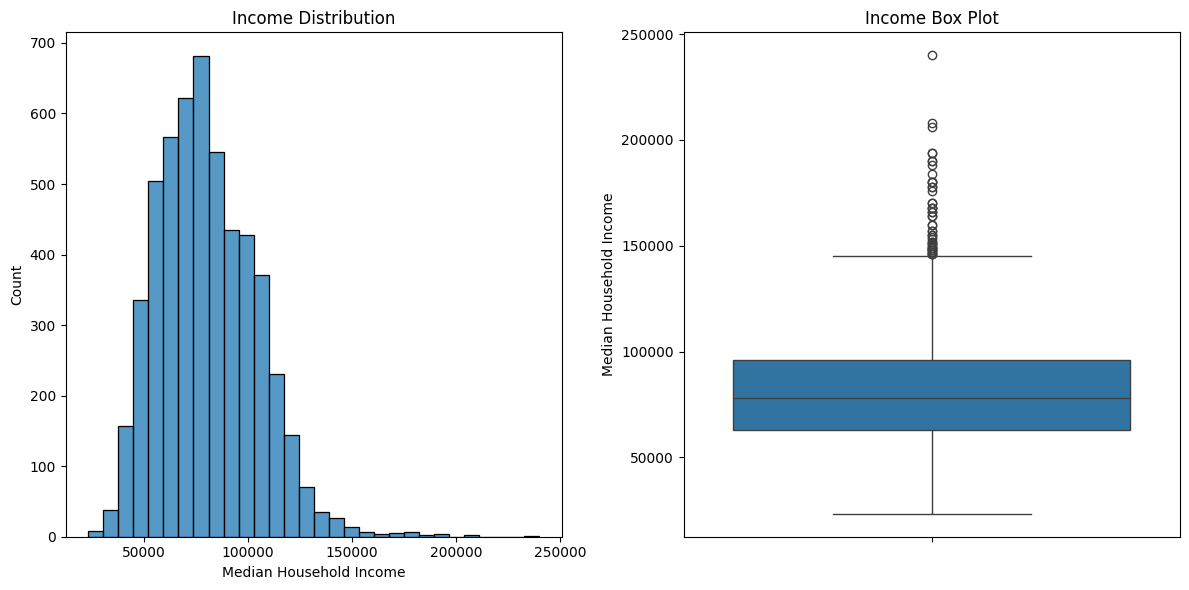


Income Summary Statistics:
count      5245.000000
mean      80443.679695
std       23524.348532
min       23400.000000
25%       62800.000000
50%       78000.000000
75%       96000.000000
max      240000.000000
Name: MedianHouseholdIncome(CurrentYearDollar), dtype: float64

Correlations with Median Household Income:
MedianHouseholdIncome(CurrentYearDollar)    1.000000
ownership_rate                              0.758808
population_density                          0.693781
house_ratio                                 0.685660
post_2000_ratio                             0.352604
pre_1961_ratio                             -0.333407
apartment_ratio                            -0.676938
Name: MedianHouseholdIncome(CurrentYearDollar), dtype: float64


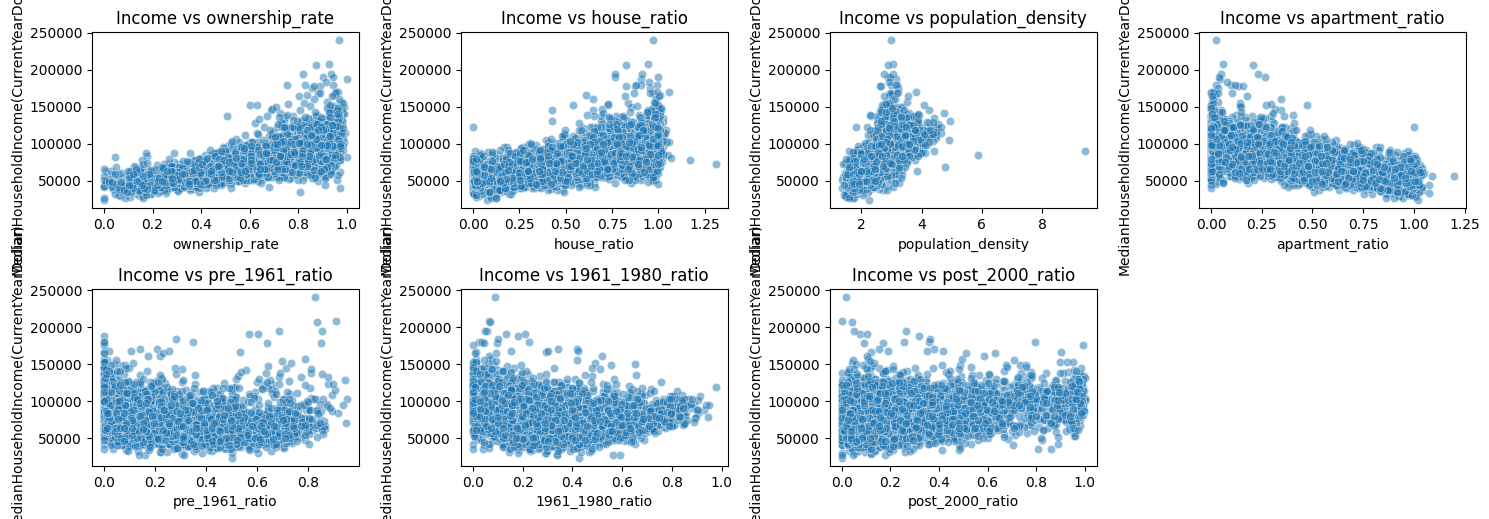

,TotalPopulation,TotalHouseholds,TotalHouseholdsForPeriodOfConstruction,household_builtBefore1961,household_builtBetween1961And1980,household_builtBetween1981And190,household_builtBetween1991And2000,household_builtBetween2001And2005,household_builtBetween2006And2010,household_builtBetween2011And2015,...,MedianHouseholdIncome(CurrentYearDollar),HousingDensity,RenterRatio,ownership_rate,house_ratio,apartment_ratio,population_density,pre_1961_ratio,1961_1980_ratio,post_2000_ratio
0,3088,1235.0,1235.0,25.0,1130.0,50.0,15.0,10.0,10.0,0.0,...,107000.0,2.500405,0.145749,0.854251,0.919028,0.105263,2.500405,0.020243,0.914980,0.016194
1,5889,1665.0,1665.0,0.0,0.0,0.0,15.0,20.0,375.0,315.0,...,111000.0,3.536937,0.180180,0.819820,0.963964,0.030030,3.536937,0.000000,0.000000,0.987988
2,8090,2775.0,2775.0,105.0,150.0,240.0,1210.0,555.0,165.0,240.0,...,105000.0,2.915315,0.151351,0.850450,0.855856,0.144144,2.915315,0.037838,0.054054,0.389189
3,4074,1775.0,1775.0,210.0,1100.0,260.0,85.0,35.0,45.0,30.0,...,65000.0,2.295211,0.225352,0.774648,0.712676,0.154930,2.295211,0.118310,0.619718,0.070423
4,3642,1385.0,1385.0,10.0,190.0,1010.0,165.0,0.0,0.0,10.0,...,101000.0,2.629603,0.101083,0.902527,0.747292,0.234657,2.629603,0.007220,0.137184,0.007220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5366,3409,1460.0,1460.0,15.0,0.0,0.0,0.0,20.0,40.0,465.0,...,84000.0,2.334932,0.273973,0.726027,0.534247,0.462329,2.334932,0.010274,0.000000,0.986301
5367,8408,4195.0,4195.0,335.0,750.0,515.0,580.0,355.0,505.0,255.0,...,62800.0,2.004291,0.560191,0.439809,0.358760,0.640048,2.004291,0.079857,0.178784,0.480334
5368,3609,1460.0,1460.0,450.0,670.0,85.0,35.0,30.0,30.0,120.0,...,66000.0,2.471918,0.359589,0.643836,0.835616,0.188356,2.471918,0.308219,0.458904,0.154110
5369,3084,1165.0,1165.0,70.0,365.0,280.0,180.0,105.0,80.0,50.0,...,100000.0,2.647210,0.163090,0.836910,0.699571,0.287554,2.647210,0.060086,0.313305,0.236052


In [20]:
run_eda(df_data)

# K-Means Clustering

## What columns should we feed kmeans?

In [21]:
def unique_combinations(input_list):
    # Generate all 2-element combinations and convert each to a list
    return [list(comb) for comb in itertools.combinations(input_list, 3)]


In [22]:
all_cols = [col for col in df_data.columns if 'Median' not in col]
select_cols = ['house_ratio', 'apartment_ratio',
       'pre_1961_ratio', '1961_1980_ratio', 'post_2000_ratio',
       'HousingDensity', 'RenterRatio']

In [23]:
# Get the unique 2-element combinations
combinations = unique_combinations(select_cols)

#### Loop to find the best clusters given a list of columns

In [24]:
# Special loop to iterate through all combinations identified above. 
# Takes up to 30 mins to cyle through 800 combinations

# dicto = {}
# i = 0 

# for elem in combinations:
#     i+= 1
#     print(i/len(combinations))

#     scaler = StandardScaler()

#     df_subset = df_data[elem]
#     scaler.fit(df_subset)
#     scaled_features = scaler.transform(df_subset)
#     scaledDf = pd.DataFrame(scaled_features, columns = df_subset.columns)



#     ClusterRange = range(2, 6)
#     average_silhouette_scores = []


#     # Iterate through the range of clusters
#     for k in ClusterRange:
#         kmeansmodel = KMeans(n_clusters=k, n_init=10, random_state=20)
        
#         # Fit and predict clusters
#         labels = kmeansmodel.fit_predict(scaledDf)
        
#         # Calculate silhouette score for each point
#         sample_silhouette_values = silhouette_samples(scaledDf, labels)
        
#         cluster_labels = kmeansmodel.labels_

#         means_lst = []
#         for label in range(k):
#             means_lst.append(sample_silhouette_values[cluster_labels == label].mean())

#         dicto[f'{elem}_{k}'] = np.mean(sample_silhouette_values)

#         # Calculate the average silhouette score for this clustering
#         avg_silhouette_score = np.mean(sample_silhouette_values)
#         average_silhouette_scores.append(avg_silhouette_score)
    
#     # Optional: Print the average silhouette score for each k
#     # print(f"Average Silhouette Score for k={k}: {avg_silhouette_score}")
#     # print(f'Cluster Scores \n{means_lst}\n' )

# max_key = max(dicto, key=dicto.get)

# print("Key with max value:", max_key)
# print("Max value:", dicto[max_key])

In [25]:
# with open('dicto_3elem_select_4_new.txt', 'w') as f:
#     # Convert dictionary to JSON string and write it to the file
#     json.dump(dicto, f, indent=4)

# K Means

In [26]:
#ScaleData
og_list = ['ownership_rate','house_ratio','population_density'] 
# highest silhouette score of 0.50 at 2 cluster

test_1 = ['HousingDensity','pre_1961_ratio', '1961_1980_ratio', 'post_2000_ratio']
# highest silhouette score of 0.35 at 2 cluster

test_2 = ['HousingDensity', 'RenterRatio','Structure_Apartment_BuildingLowAndHighRise' ]
# highest silhouette score of 0.48 at 2 cluster

test_2 = ['HousingDensity', 'RenterRatio','Structure_Apartment_BuildingLowAndHighRise' ]
# highest silhouette score of 0.48 at 2 cluster

test_3 = ['ownership_rate','house_ratio'] 
# highest silhouette score of 0.60 at 2 cluster, peak at 64, useful one at k = 3, 2/3 are above 0.5 and last one is 0.3

test_4 = ['house_ratio','population_density','post_2000_ratio'] 
# highest silhouette score of 0.60 at 2 cluster, peak at 64

test_5 = ['TotalPopulation', 'TotalHouseholds']

test_6 = ['household_builtBetween2016And2021', 'Structure_OtherDwellingTypes']

test_7 = ['household_builtBetween2011And2015', 'household_builtBetween2016And2021', 'Structure_OtherDwellingTypes'] 
#0.75, 3 clusters

test_8 = ['house_ratio', 'apartment_ratio', 'RenterRatio'] 
#0.61, 2 cluster, but 0.52 with 3 clusters


#### Start K-means with a subset

In [27]:
#Set the subset here!
chosen_subset = test_8 # we can also use OG list, k = 3, but the silhouette scores are about 0.3


# Running k-means using the subset identified above
df_subset = df_data[chosen_subset]

scaler = StandardScaler()
scaler.fit(df_subset)
 
scaled_features = scaler.transform(df_subset)
scaledDf = pd.DataFrame(scaled_features, columns = df_subset.columns)
scaledDf.head()
 

,house_ratio,apartment_ratio,RenterRatio
0,0.963812,-0.851169,-0.849448
1,1.108232,-1.089991,-0.699074
2,0.760779,-0.727744,-0.824980
3,0.300609,-0.693506,-0.501791
4,0.411864,-0.440417,-1.044521


# Part C
Assess the clusters

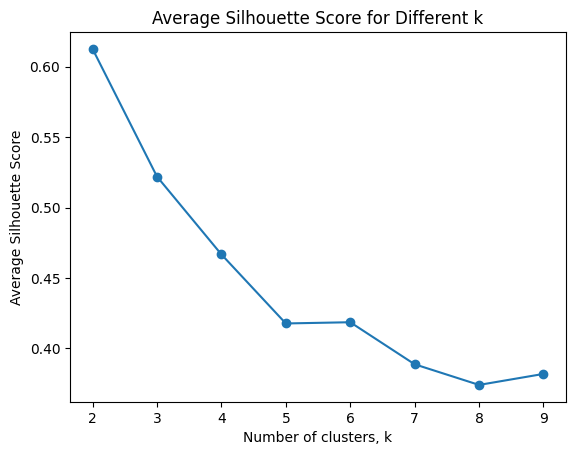

Using 2 clusters - Average 0.613 
Individual Cluster Silhouette Scores: ['0.530', '0.656']

Using 3 clusters - Average 0.522 
Individual Cluster Silhouette Scores: ['0.387', '0.509', '0.613']

Using 4 clusters - Average 0.467 
Individual Cluster Silhouette Scores: ['0.341', '0.583', '0.503', '0.357']

Using 5 clusters - Average 0.418 
Individual Cluster Silhouette Scores: ['0.318', '0.304', '0.570', '0.495', '0.328']

Using 6 clusters - Average 0.419 
Individual Cluster Silhouette Scores: ['0.572', '0.276', '0.311', '0.512', '0.325', '0.358']

Using 7 clusters - Average 0.389 
Individual Cluster Silhouette Scores: ['0.557', '0.283', '0.377', '0.482', '0.276', '0.304', '0.286']

Using 8 clusters - Average 0.374 
Individual Cluster Silhouette Scores: ['0.282', '0.296', '0.287', '0.450', '0.270', '0.327', '0.355', '0.545']

Using 9 clusters - Average 0.382 
Individual Cluster Silhouette Scores: ['0.541', '0.290', '0.310', '0.353', '0.246', '0.353', '0.322', '0.353', '0.419']



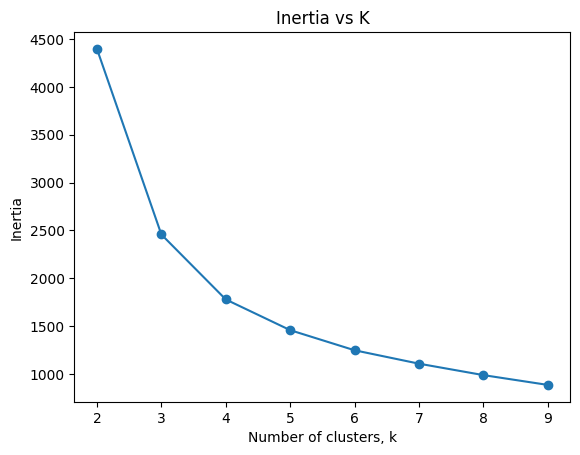

In [28]:
ClusterRange = range(2, 10)
average_silhouette_scores = []
dicto = {}
inertias = []

# Iterate through the range of clusters
for k in ClusterRange:
    kmeansmodel = KMeans(n_clusters=k, n_init=10, random_state=20)
    
    # Fit and predict clusters
    labels = kmeansmodel.fit_predict(scaledDf)
    inertias.append(kmeansmodel.inertia_)
    
    # Calculate silhouette score for each point
    sample_silhouette_values = silhouette_samples(scaledDf, labels)
    

    cluster_labels = kmeansmodel.labels_
    means_lst = []
    for label in range(k):
        means_lst.append(sample_silhouette_values[cluster_labels == label].mean())
    dicto[k] = means_lst

    # Calculate the average silhouette score for this clustering
    avg_silhouette_score = np.mean(sample_silhouette_values)
    average_silhouette_scores.append(avg_silhouette_score)
    
    # Optional: Print the average silhouette score for each k
    # print(f"Average Silhouette Score for k={k}: {avg_silhouette_score}")
    # print(f'Cluster Scores \n{means_lst}\n' )

# Plot the average silhouette scores for each k
plt.plot(ClusterRange, average_silhouette_scores, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Average Silhouette Score')
plt.xticks(ClusterRange)
plt.title('Average Silhouette Score for Different k')
plt.show()

i= 0
for k,v in dicto.items():
    print(f'Using {k} clusters - Average {average_silhouette_scores[i]:.3f} \nIndividual Cluster Silhouette Scores: {[f"{score:.3f}" for score in v]}\n')
    i +=1

# Plot the Inertia scores for each k
plt.plot(ClusterRange, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ClusterRange)
plt.title('Inertia vs K')
plt.show()



# Part D
What if we added median income to the clustering?

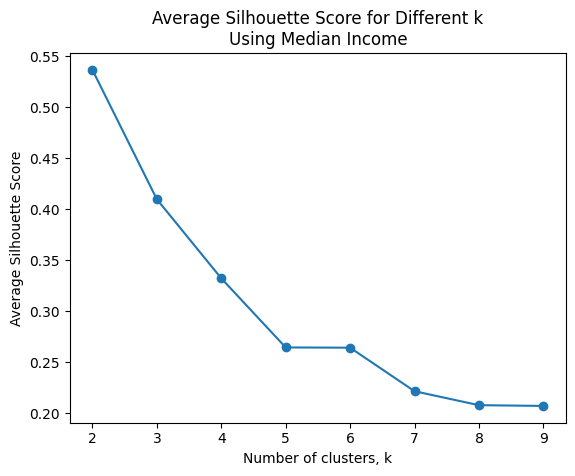

Using 2 clusters - Average 0.537 
Individual Cluster Silhouette Scores: ['0.519', '0.546']

Using 3 clusters - Average 0.410 
Individual Cluster Silhouette Scores: ['0.332', '0.473', '0.427']

Using 4 clusters - Average 0.332 
Individual Cluster Silhouette Scores: ['0.269', '0.359', '0.453', '0.260']

Using 5 clusters - Average 0.265 
Individual Cluster Silhouette Scores: ['0.179', '0.226', '0.283', '0.432', '0.241']

Using 6 clusters - Average 0.264 
Individual Cluster Silhouette Scores: ['0.284', '0.209', '0.175', '0.452', '0.224', '0.272']

Using 7 clusters - Average 0.222 
Individual Cluster Silhouette Scores: ['0.242', '0.211', '0.295', '0.402', '0.153', '0.142', '0.180']

Using 8 clusters - Average 0.208 
Individual Cluster Silhouette Scores: ['0.214', '0.124', '0.207', '0.396', '0.109', '0.238', '0.271', '0.218']

Using 9 clusters - Average 0.207 
Individual Cluster Silhouette Scores: ['0.216', '0.206', '0.216', '0.263', '0.127', '0.266', '0.125', '0.201', '0.362']



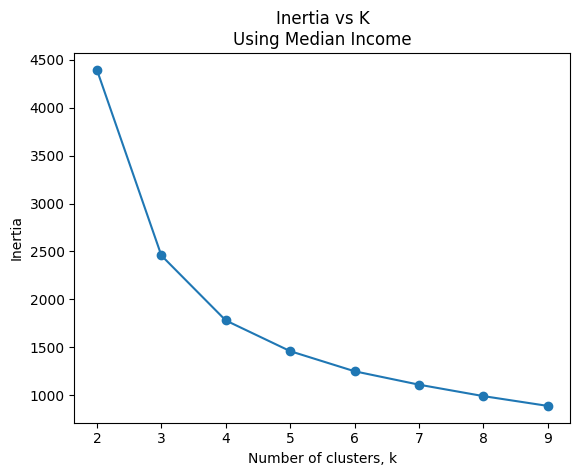

In [29]:
chosen_subset_income = chosen_subset + ['MedianHouseholdIncome(CurrentYearDollar)']

# Running k-means using the subset identified above
df_subset_income = df_data[chosen_subset_income]

scaler = StandardScaler()
scaler.fit(df_subset_income)
 
scaled_features_income = scaler.transform(df_subset_income)
scaledDf_income = pd.DataFrame(scaled_features_income, columns = df_subset_income.columns)
scaledDf_income.head()

'''
Actual Clustering Model
'''


ClusterRange = range(2, 10)
average_silhouette_scores = []
dicto = {}
inertias = []

# Iterate through the range of clusters
for k in ClusterRange:
    kmeansmodel = KMeans(n_clusters=k, n_init=10, random_state=20)
    
    # Fit and predict clusters
    labels = kmeansmodel.fit_predict(scaledDf)
    inertias.append(kmeansmodel.inertia_)
    
    # Calculate silhouette score for each point
    sample_silhouette_values = silhouette_samples(scaledDf_income, labels)
    

    cluster_labels = kmeansmodel.labels_
    means_lst = []
    for label in range(k):
        means_lst.append(sample_silhouette_values[cluster_labels == label].mean())
    dicto[k] = means_lst

    # Calculate the average silhouette score for this clustering
    avg_silhouette_score = np.mean(sample_silhouette_values)
    average_silhouette_scores.append(avg_silhouette_score)
    
    # Optional: Print the average silhouette score for each k
    # print(f"Average Silhouette Score for k={k}: {avg_silhouette_score}")
    # print(f'Cluster Scores \n{means_lst}\n' )

# Plot the average silhouette scores for each k
plt.plot(ClusterRange, average_silhouette_scores, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Average Silhouette Score')
plt.xticks(ClusterRange)
plt.title('Average Silhouette Score for Different k\nUsing Median Income')
plt.show()


i= 0
for k,v in dicto.items():
    print(f'Using {k} clusters - Average {average_silhouette_scores[i]:.3f} \nIndividual Cluster Silhouette Scores: {[f"{score:.3f}" for score in v]}\n')
    i +=1


# Plot the inertia scores for each k
plt.plot(ClusterRange, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ClusterRange)
plt.title('Inertia vs K\nUsing Median Income')
plt.show()


#### We decide to keep using the kmean model that does NOT include the Median Income

#### Actual K-means Model


In [30]:
# Based on the outout above, how many clusters do we want?
chosen_cluster = 3

#initalize a kmeansmodel
kmeansmodel  =KMeans(n_clusters=chosen_cluster,
                     n_init = 10,
                     random_state=20 )
 
 
# Writing the clusters
kmeansmodel.fit_predict(scaledDf)
df_subset['ClusterLabel'] = kmeansmodel.labels_
df_data['ClusterLabel'] = kmeansmodel.labels_
 
 
# Getting Centroids:
centroids = kmeansmodel.cluster_centers_
centroids = pd.DataFrame(centroids)
centroids.columns = [col for col in df_subset.columns if 'ClusterLabel' not in col]
display(centroids)

# Visualization
if len(chosen_subset) > 2:
    fid = px.scatter_3d(df_subset, x =df_subset.columns[0],
                        y= df_subset.columns[1],
                        z= df_subset.columns[2],
                        color = df_subset.ClusterLabel,
                        title='K-Means Clustering Results'
                        )
    
    
    fid.update_layout(
        width=800,  
        height=800,  
    )
    fid.show()
else:
    fid = px.scatter(df_subset, x=df_subset.columns[0],
                 y=df_subset.columns[1],
                 color=df_subset['ClusterLabel'],
                 title='K-Means Clustering Results')
    fid.update_layout(
        width=800,  
        height=800,  
    )
    fid.show()
    

,house_ratio,apartment_ratio,RenterRatio
0,-0.162278,0.166061,0.181241
1,-1.494166,1.501146,1.392636
2,0.851003,-0.856882,-0.812045


# Part D Continued
Descriptive Stats on the Clusters

In [31]:
for cluster in sorted(df_data['ClusterLabel'].unique()):
    print(f"\nCluster {cluster} Summary Stats:")

    df_temp = df_data[['ClusterLabel',
                       'MedianHouseholdIncome(CurrentYearDollar)',
                       'HousingDensity',
                       'Structure_Apartment_BuildingLowAndHighRise',
                       'apartment_ratio',
                       'DwellingsbyTenureOwner',
                       'ownership_rate',
                       'DwellingsbyTenureRenter'
                       ]]
    
    display(df_temp[df_temp['ClusterLabel'] == cluster].describe().T)


Cluster 0 Summary Stats:


,count,mean,std,min,25%,50%,75%,max
ClusterLabel,1548.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MedianHouseholdIncome(CurrentYearDollar),1548.0,74268.540052,15168.057008,35200.000000,64000.000000,73000.000000,82000.000000,153000.000000
HousingDensity,1548.0,2.500522,0.387524,1.696815,2.228428,2.422915,2.684829,4.398010
Structure_Apartment_BuildingLowAndHighRise,1548.0,820.400517,422.927245,0.000000,515.000000,742.500000,1045.000000,3435.000000
apartment_ratio,1548.0,0.426177,0.122292,0.000000,0.333185,0.412646,0.516979,0.784810
DwellingsbyTenureOwner,1548.0,1174.428295,498.569491,25.000000,830.000000,1122.500000,1430.000000,3620.000000
ownership_rate,1548.0,0.617042,0.116316,0.046296,0.539457,0.626520,0.697903,0.907063
DwellingsbyTenureRenter,1548.0,727.160853,356.477412,20.000000,460.000000,675.000000,936.250000,3005.000000



Cluster 1 Summary Stats:


,count,mean,std,min,25%,50%,75%,max
ClusterLabel,1233.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
MedianHouseholdIncome(CurrentYearDollar),1233.0,56902.514193,12225.973728,23400.000000,48800.000000,55600.000000,64000.000000,123000.000000
HousingDensity,1233.0,2.079951,0.394707,1.366667,1.809351,1.997156,2.273143,3.991489
Structure_Apartment_BuildingLowAndHighRise,1233.0,1802.445255,968.771796,115.000000,1130.000000,1610.000000,2260.000000,7830.000000
apartment_ratio,1233.0,0.846501,0.128322,0.501099,0.737984,0.867679,0.962500,1.195652
DwellingsbyTenureOwner,1233.0,740.125710,515.731777,0.000000,365.000000,620.000000,980.000000,3970.000000
ownership_rate,1233.0,0.340586,0.144011,0.000000,0.245690,0.336671,0.427885,0.885246
DwellingsbyTenureRenter,1233.0,1377.238443,709.424338,35.000000,890.000000,1245.000000,1735.000000,5290.000000



Cluster 2 Summary Stats:


,count,mean,std,min,25%,50%,75%,max
ClusterLabel,2464.0,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.00000
MedianHouseholdIncome(CurrentYearDollar),2464.0,96103.327922,20303.806554,40400.000000,82000.000000,95000.000000,107250.000000,240000.00000
HousingDensity,2464.0,2.841619,0.451208,1.552632,2.547459,2.767817,3.041464,9.40000
Structure_Apartment_BuildingLowAndHighRise,2464.0,182.749594,184.363249,0.000000,35.000000,130.000000,280.000000,1325.00000
apartment_ratio,2464.0,0.103492,0.083762,0.000000,0.026696,0.088889,0.166667,0.36381
DwellingsbyTenureOwner,2464.0,1386.988636,656.475136,0.000000,955.000000,1325.000000,1731.250000,6080.00000
ownership_rate,2464.0,0.842300,0.088721,0.000000,0.792131,0.853564,0.906091,1.00000
DwellingsbyTenureRenter,2464.0,262.224026,197.954432,0.000000,120.000000,215.000000,360.000000,1850.00000


#### Do some EDA for on the clusters and see what makes them meaningfully different

In [32]:
Clustername = { 0:"Mixed Suburban", 1: "Urban Rental District", 2: "Affluent Owner Occupied"}
df_data['ClusterName'] = df_data.ClusterLabel.map(Clustername)

In [33]:
def createPlots(predictor = 'TotalHouseholds'):
    # Specify the predictor column and the clusters
    predictor_column = predictor  # Replace with the name of your predictor column

    # Get unique clusters
    clusters = sorted(df_data['ClusterName'].unique())

    # Create the plot
    plt.figure(figsize=(10, 6))

    # Loop through each cluster and plot its histogram
    for cluster in clusters:
        sns.histplot(df_data[df_data['ClusterName'] == cluster][predictor_column], label=f'Cluster {cluster}', kde=True)

    # Set plot labels and title
    plt.title(f'Histograms of {predictor_column} by Cluster')
    plt.xlabel(predictor_column)
    plt.ylabel('Frequency')

    # Show the legend
    plt.legend(title='Cluster')

    # Show the plot
    plt.tight_layout()
    plt.show()


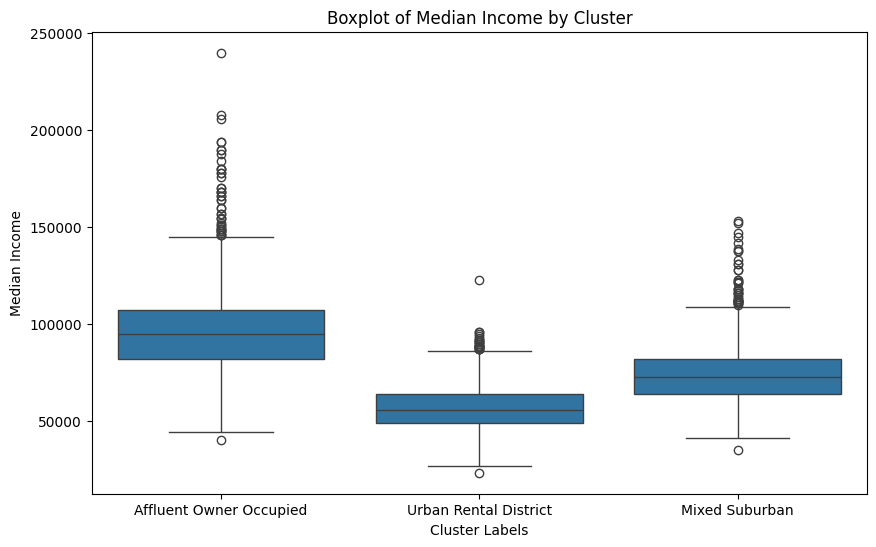

In [34]:
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(x='ClusterName', y='MedianHouseholdIncome(CurrentYearDollar)', data=df_data)

# Set plot labels and title
plt.xlabel('Cluster Labels')
plt.ylabel('Median Income')
plt.title('Boxplot of Median Income by Cluster')

# Display the plot
plt.show()

In [35]:
def createIndivPlots(predictor='TotalHouseholds'):
    # Specify the predictor column and the clusters
    predictor_column = predictor  # Replace with the name of your predictor column

    # Get unique clusters
    clusters = sorted(df_data['ClusterName'].unique())

    # Loop through each cluster and plot its histogram on a separate plot
    for cluster in clusters:
        # Create a new figure for each cluster
        plt.figure(figsize=(10, 6))
        
        # Plot the histogram for the current cluster
        sns.histplot(df_data[df_data['ClusterName'] == cluster][predictor_column], kde=True)
        
        # Set plot labels and title
        plt.title(f'Histogram of {predictor_column} for Cluster {cluster}')
        plt.xlabel(predictor_column)
        plt.ylabel('Frequency')
        
        # Show the plot
        plt.tight_layout()
        plt.show()

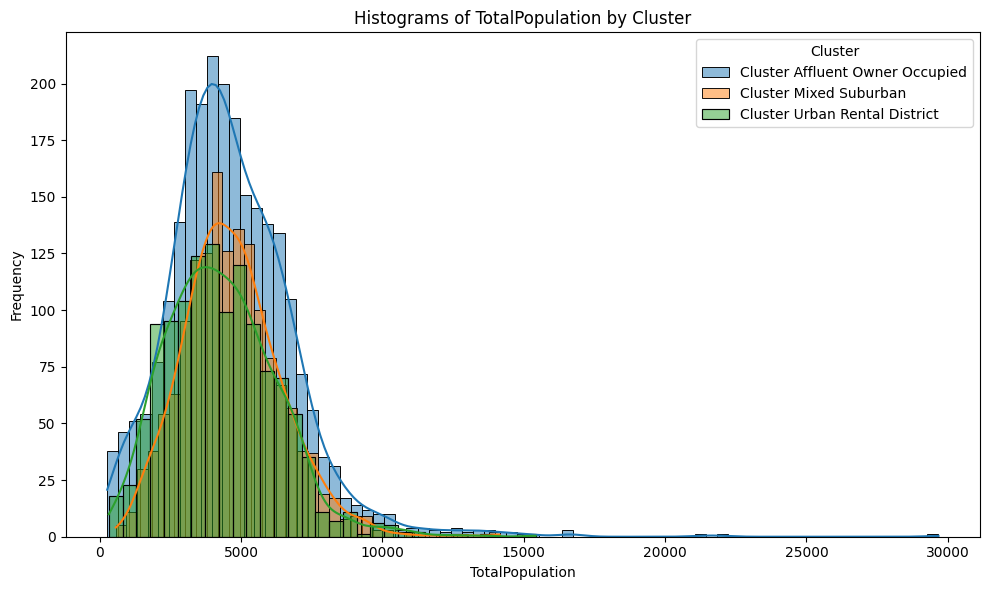

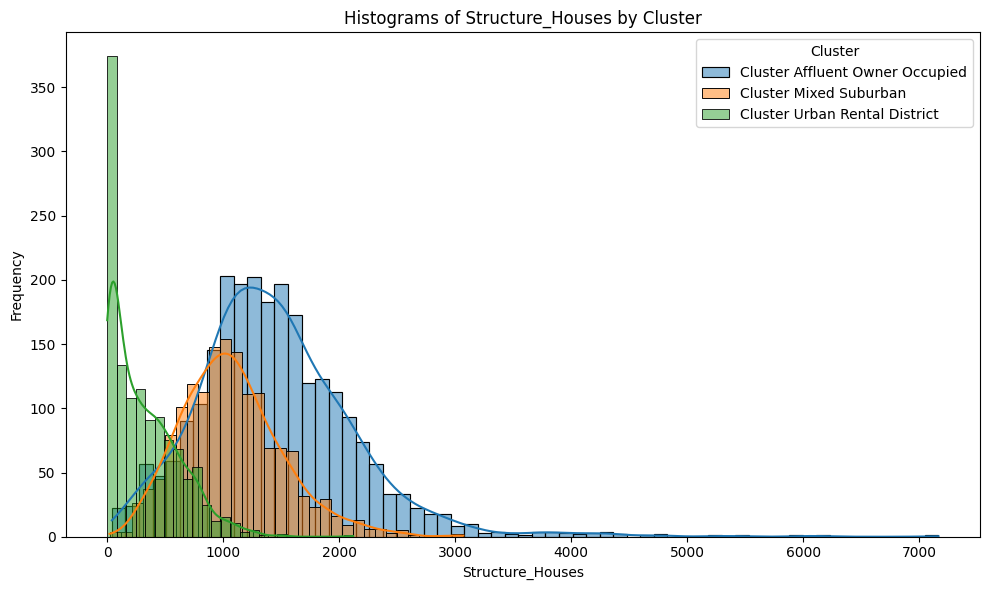

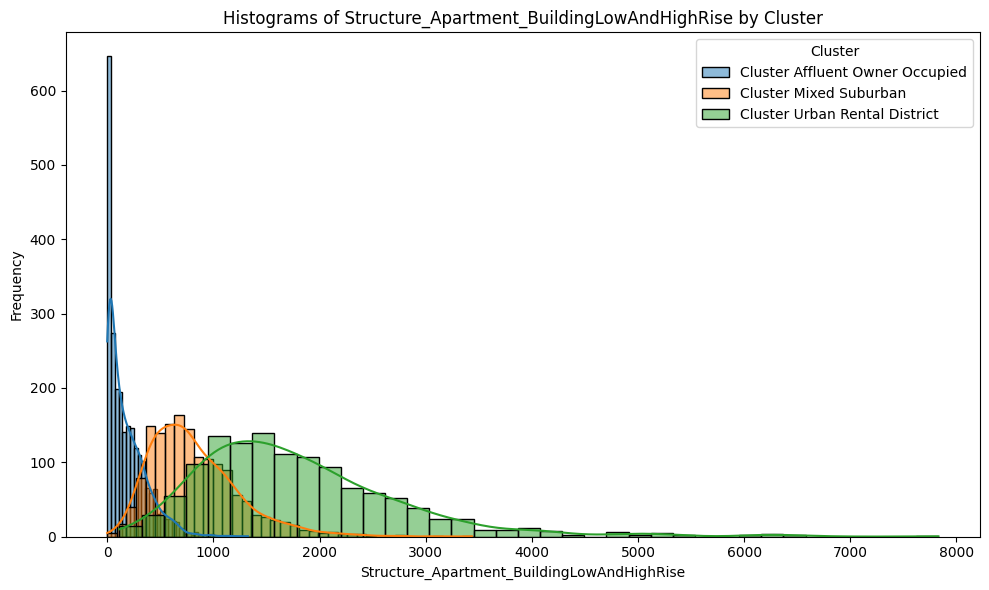

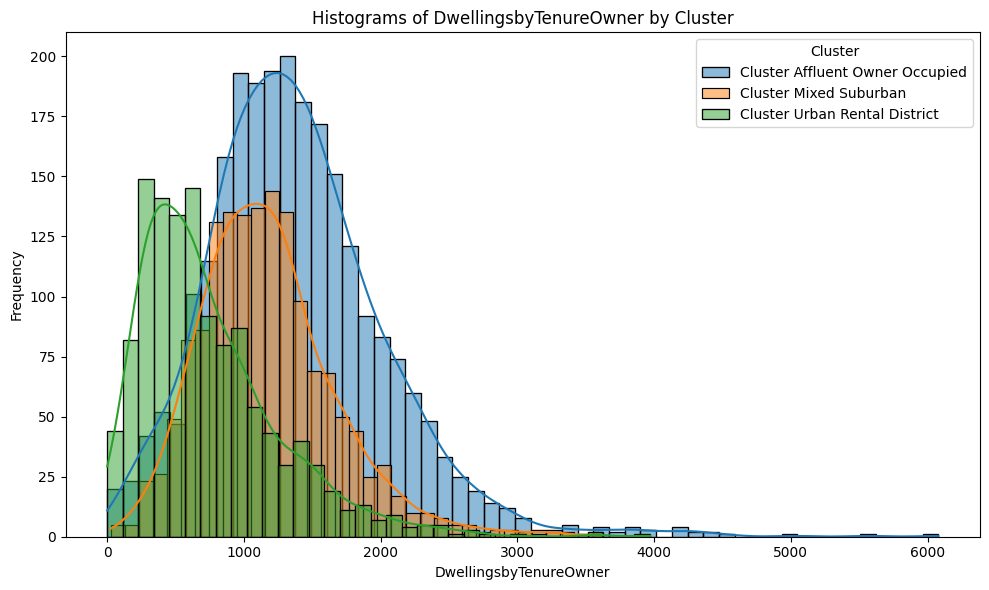

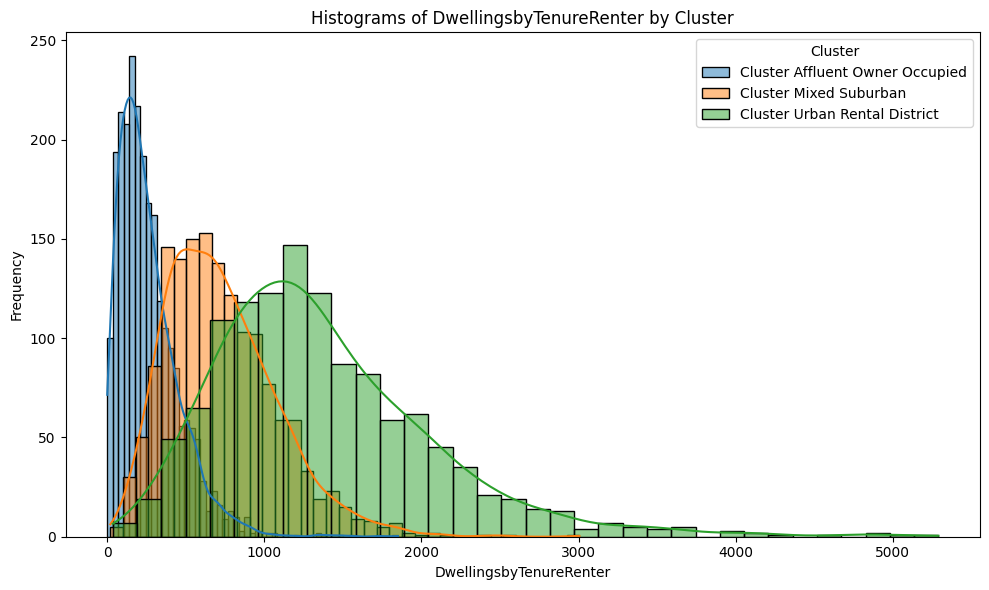

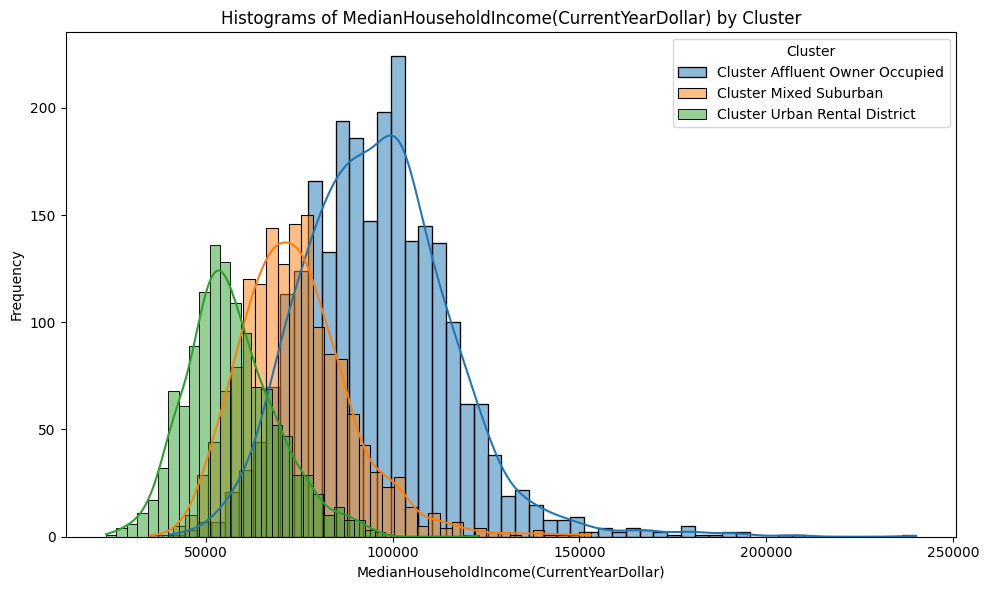

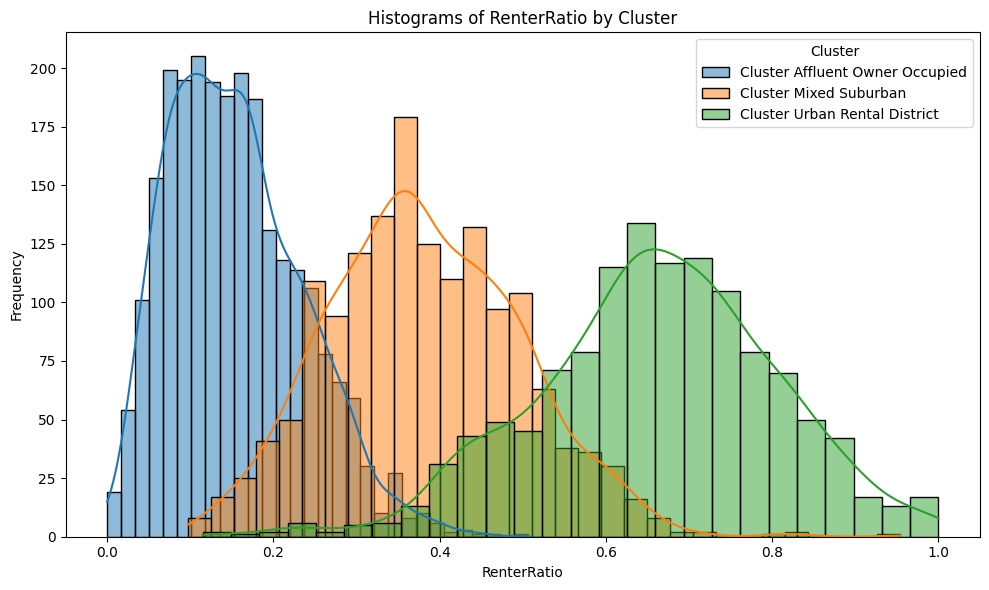

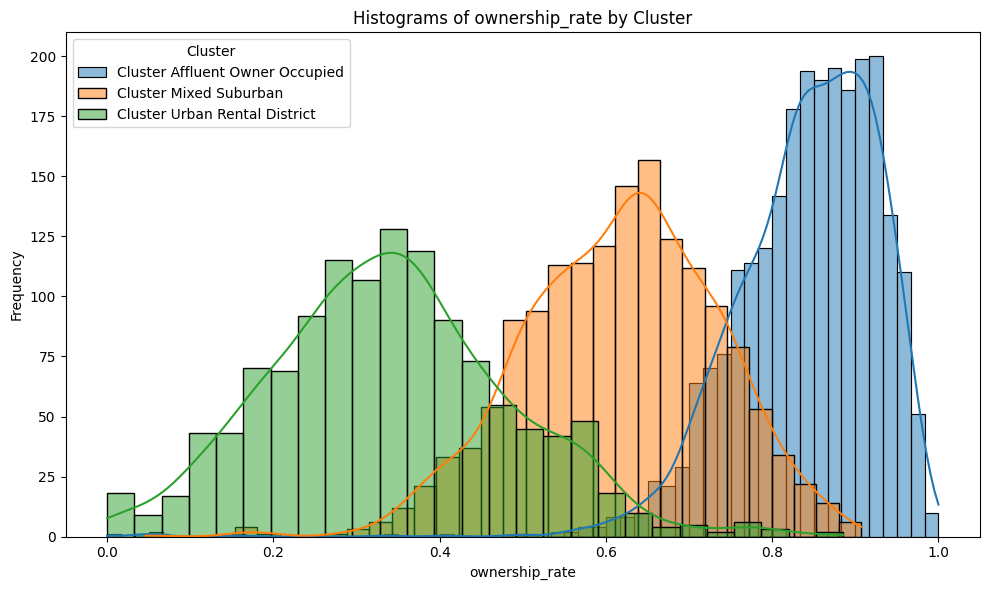

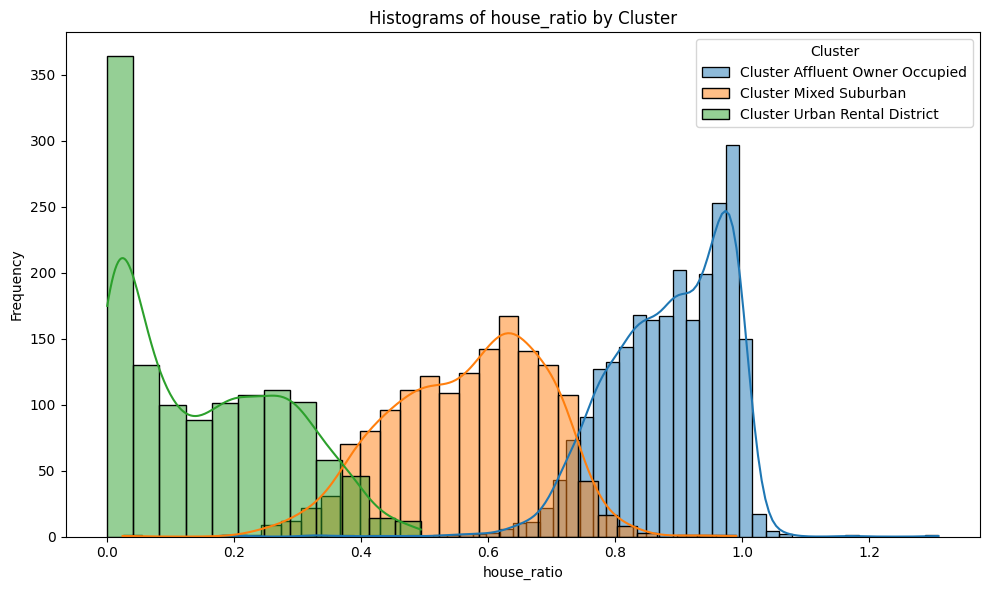

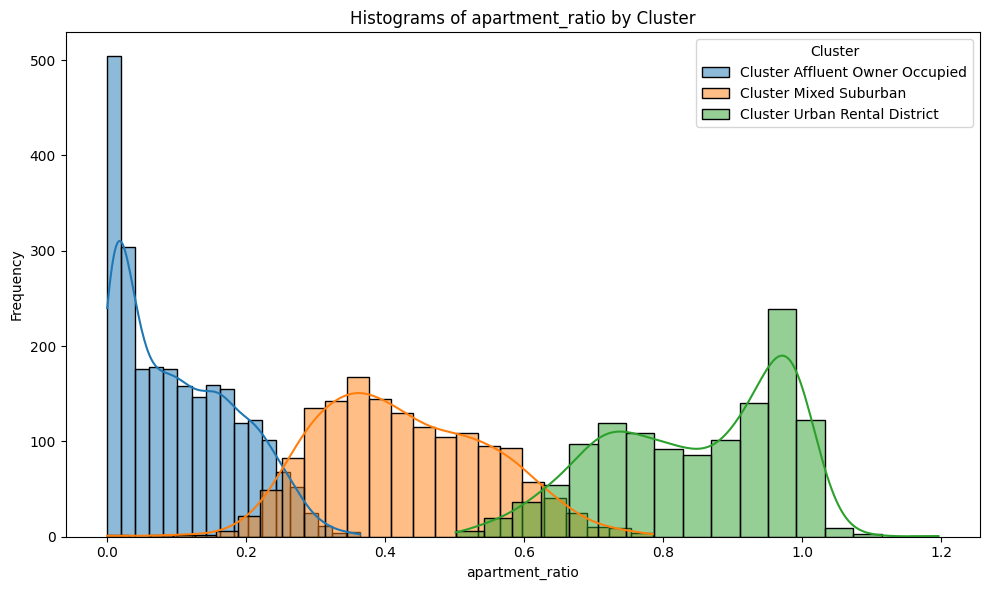

In [36]:
# used to be all_cols

plot_cols = [ 'TotalPopulation', 'Structure_Houses', 'Structure_Apartment_BuildingLowAndHighRise',
 'DwellingsbyTenureOwner', 'DwellingsbyTenureRenter', 'MedianHouseholdIncome(CurrentYearDollar)',
 'RenterRatio', 'ownership_rate', 'house_ratio', 'apartment_ratio']

for a in plot_cols:
    createPlots(predictor=a)

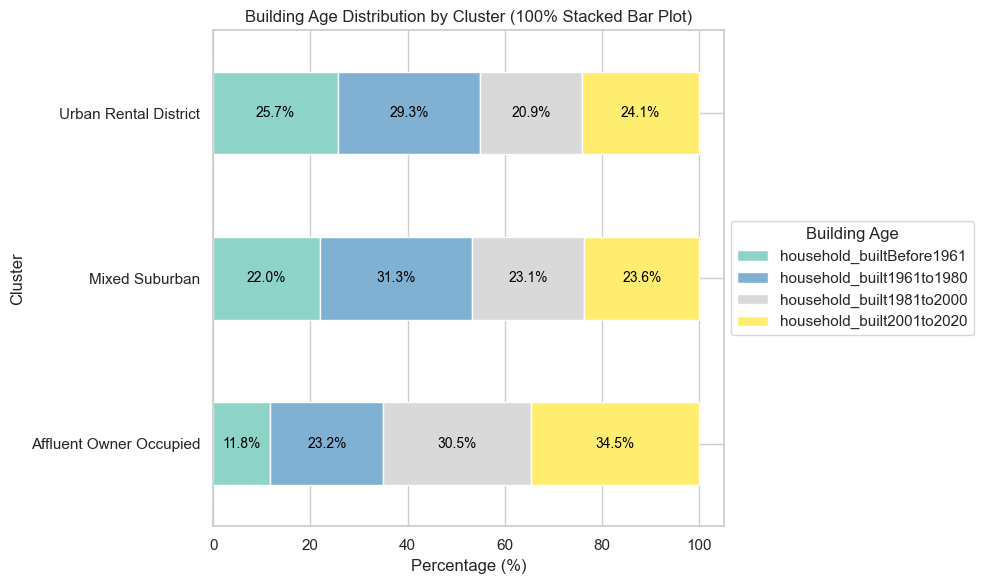

In [37]:
# Visualizing the age makeup
df_households = df_data[['household_builtBefore1961',
       'household_builtBetween1961And1980', 'household_builtBetween1981And190',
       'household_builtBetween1991And2000',
       'household_builtBetween2001And2005',
       'household_builtBetween2006And2010',
       'household_builtBetween2011And2015',
       'household_builtBetween2016And2021', 'ClusterName']]

# Create new columns to group the building age categories into 20-year periods
df_households['household_builtBefore1961'] = df_households['household_builtBefore1961']
df_households['household_built1961to1980'] = df_households['household_builtBetween1961And1980']
df_households['household_built1981to2000'] = df_households['household_builtBetween1981And190'] + df_households['household_builtBetween1991And2000']
df_households['household_built2001to2020'] = (df_households['household_builtBetween2001And2005'] + 
                                         df_households['household_builtBetween2006And2010'] +
                                         df_households['household_builtBetween2011And2015'] + 
                                         df_households['household_builtBetween2016And2021'])

# Group the data by 'ClusterName' and aggregate the new age groupings
df_grouped = df_households.groupby('ClusterName')[[
    'household_builtBefore1961',
    'household_built1961to1980',
    'household_built1981to2000',
    'household_built2001to2020'
]].sum()

# Normalize the data to make it a 100% stacked bar (divide each value by the row sum)
df_grouped_normalized = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100

# Plot using Seaborn
sns.set(style="whitegrid")

# Create a horizontal 100% stacked bar plot
ax = df_grouped_normalized.plot(kind='barh', stacked=True, figsize=(10, 6), colormap="Set3")

# Add data labels to each segment of the stacked bars
for p in ax.patches:
    width = p.get_width()  # Get the width of the bar segment (this will be the percentage value)
    height = p.get_height()  # Get the height of the bar (usually 1)
    x = p.get_x() + width / 2  # X position for the label (center of the bar segment)
    y = p.get_y() + height / 2  # Y position for the label (center of the bar segment)
    
    # Only place labels on segments with a width (value) greater than 0
    if width > 0:
        ax.text(x, y, f'{width:.1f}%', ha='center', va='center', fontsize=10, color='black')

# Customize the plot
plt.title('Building Age Distribution by Cluster (100% Stacked Bar Plot)')
plt.xlabel('Percentage (%)')
plt.ylabel('Cluster')
plt.legend(title='Building Age', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.show()

# Part E
Birch Clustering

In [38]:
from sklearn.cluster import Birch
 
df_subset = df_data[chosen_subset]
 
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_subset)
scaledDf = pd.DataFrame(scaled_features, columns=df_subset.columns)
 
birch_model = Birch(n_clusters=chosen_cluster, threshold=0.001, branching_factor=10)
birch_labels = birch_model.fit_predict(df_subset)
 
df_subset['BirchLabel'] = birch_labels
df_data['BirchLabel'] = birch_labels
 

 # fig = px.scatter_3d(df_subset,
#                     x=chosen_subset[0],
#                     y=chosen_subset[1],
#                     z = chosen_subset[2],
#                     color='BirchLabel',
#                     title='BIRCH Clustering Results')
 
# fig.update_layout(width=1000, height=1000)
# fig.show()
 

if len(chosen_subset) >2:
    fig = px.scatter_3d(df_subset,
                        x=chosen_subset[0],
                        y=chosen_subset[1],
                        z = chosen_subset[2],
                        color='BirchLabel',
                        title='BIRCH Clustering Results')
    
    fig.update_layout(width=800, height=800)
    fig.show()
else:
    fig = px.scatter(df_subset, 
                     x=df_subset.columns[0],
                     y=df_subset.columns[1],
                     color='BirchLabel',
                     title='BIRCH Clustering Results')
    
    fig.update_layout(
        width=800,  
        height=800,  
    )
    fig.show()
    

for cluster in sorted(df_data['BirchLabel'].unique()):
    print(f"\nBIRCH Cluster {cluster} Summary Stats:")

    df_temp = df_data[['BirchLabel',
                       'MedianHouseholdIncome(CurrentYearDollar)',
                       'HousingDensity',
                       'Structure_Apartment_BuildingLowAndHighRise',
                       'apartment_ratio',
                       'DwellingsbyTenureOwner',
                       'ownership_rate',
                       'DwellingsbyTenureRenter'
                       ]]
    
    display(df_temp[df_temp['BirchLabel'] == cluster].describe().T)


BIRCH Cluster 0 Summary Stats:


,count,mean,std,min,25%,50%,75%,max
BirchLabel,1533.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MedianHouseholdIncome(CurrentYearDollar),1533.0,58704.370515,12773.960763,23400.000000,50000.000000,57200.000000,66500.000000,123000.000000
HousingDensity,1533.0,2.131019,0.400975,1.366667,1.852997,2.061425,2.337432,3.991489
Structure_Apartment_BuildingLowAndHighRise,1533.0,1681.060013,928.535074,115.000000,1055.000000,1490.000000,2090.000000,7830.000000
apartment_ratio,1533.0,0.795730,0.157622,0.375796,0.666667,0.800703,0.947619,1.195652
DwellingsbyTenureOwner,1533.0,797.358121,522.177668,0.000000,405.000000,685.000000,1060.000000,3970.000000
ownership_rate,1533.0,0.373908,0.153331,0.000000,0.269231,0.369838,0.475248,0.885246
DwellingsbyTenureRenter,1533.0,1298.359426,682.578240,35.000000,825.000000,1175.000000,1635.000000,5290.000000



BIRCH Cluster 1 Summary Stats:


,count,mean,std,min,25%,50%,75%,max
BirchLabel,1685.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
MedianHouseholdIncome(CurrentYearDollar),1685.0,79435.489614,16653.871493,40400.000000,68000.000000,77000.000000,88000.000000,194000.000000
HousingDensity,1685.0,2.577274,0.382491,1.552632,2.312281,2.508824,2.768168,4.398010
Structure_Apartment_BuildingLowAndHighRise,1685.0,650.958457,350.207503,0.000000,405.000000,590.000000,825.000000,2770.000000
apartment_ratio,1685.0,0.346466,0.112130,0.000000,0.258389,0.339093,0.425662,0.629213
DwellingsbyTenureOwner,1685.0,1259.988131,533.510396,25.000000,900.000000,1190.000000,1545.000000,4430.000000
ownership_rate,1685.0,0.680771,0.114966,0.046296,0.602241,0.682292,0.767528,0.973684
DwellingsbyTenureRenter,1685.0,590.575668,310.407739,0.000000,365.000000,535.000000,780.000000,2410.000000



BIRCH Cluster 2 Summary Stats:


,count,mean,std,min,25%,50%,75%,max
BirchLabel,2027.0,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000
MedianHouseholdIncome(CurrentYearDollar),2027.0,97722.989640,20525.492164,46000.000000,84000.000000,98000.000000,109000.000000,240000.000000
HousingDensity,2027.0,2.874977,0.463014,1.739286,2.580825,2.807223,3.075635,9.400000
Structure_Apartment_BuildingLowAndHighRise,2027.0,132.590035,135.876832,0.000000,25.000000,90.000000,205.000000,1130.000000
apartment_ratio,2027.0,0.076376,0.061955,0.000000,0.020833,0.064103,0.126191,0.269912
DwellingsbyTenureOwner,2027.0,1382.683769,667.357433,0.000000,947.500000,1330.000000,1737.500000,6080.000000
ownership_rate,2027.0,0.853601,0.088747,0.000000,0.811584,0.869565,0.916084,1.000000
DwellingsbyTenureRenter,2027.0,238.971386,193.825952,0.000000,105.000000,190.000000,320.000000,1850.000000


### Birch Clustering EDA

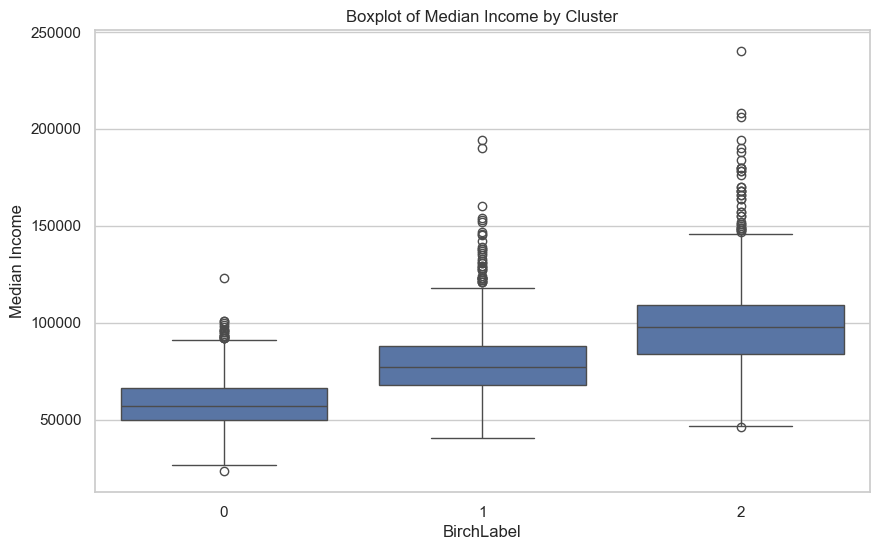

In [39]:
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(x='BirchLabel', y='MedianHouseholdIncome(CurrentYearDollar)', data=df_data)

# Set plot labels and title
plt.xlabel('BirchLabel')
plt.ylabel('Median Income')
plt.title('Boxplot of Median Income by Cluster')

# Display the plot
plt.show()

# Part 2

# Segmentation Modeling

In [40]:
df_data

,TotalPopulation,TotalHouseholds,TotalHouseholdsForPeriodOfConstruction,household_builtBefore1961,household_builtBetween1961And1980,household_builtBetween1981And190,household_builtBetween1991And2000,household_builtBetween2001And2005,household_builtBetween2006And2010,household_builtBetween2011And2015,...,ownership_rate,house_ratio,apartment_ratio,population_density,pre_1961_ratio,1961_1980_ratio,post_2000_ratio,ClusterLabel,ClusterName,BirchLabel
0,3088,1235.0,1235.0,25.0,1130.0,50.0,15.0,10.0,10.0,0.0,...,0.854251,0.919028,0.105263,2.500405,0.020243,0.914980,0.016194,2,Affluent Owner Occupied,2
1,5889,1665.0,1665.0,0.0,0.0,0.0,15.0,20.0,375.0,315.0,...,0.819820,0.963964,0.030030,3.536937,0.000000,0.000000,0.987988,2,Affluent Owner Occupied,2
2,8090,2775.0,2775.0,105.0,150.0,240.0,1210.0,555.0,165.0,240.0,...,0.850450,0.855856,0.144144,2.915315,0.037838,0.054054,0.389189,2,Affluent Owner Occupied,2
3,4074,1775.0,1775.0,210.0,1100.0,260.0,85.0,35.0,45.0,30.0,...,0.774648,0.712676,0.154930,2.295211,0.118310,0.619718,0.070423,2,Affluent Owner Occupied,1
4,3642,1385.0,1385.0,10.0,190.0,1010.0,165.0,0.0,0.0,10.0,...,0.902527,0.747292,0.234657,2.629603,0.007220,0.137184,0.007220,2,Affluent Owner Occupied,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5366,3409,1460.0,1460.0,15.0,0.0,0.0,0.0,20.0,40.0,465.0,...,0.726027,0.534247,0.462329,2.334932,0.010274,0.000000,0.986301,0,Mixed Suburban,1
5367,8408,4195.0,4195.0,335.0,750.0,515.0,580.0,355.0,505.0,255.0,...,0.439809,0.358760,0.640048,2.004291,0.079857,0.178784,0.480334,1,Urban Rental District,0
5368,3609,1460.0,1460.0,450.0,670.0,85.0,35.0,30.0,30.0,120.0,...,0.643836,0.835616,0.188356,2.471918,0.308219,0.458904,0.154110,2,Affluent Owner Occupied,1
5369,3084,1165.0,1165.0,70.0,365.0,280.0,180.0,105.0,80.0,50.0,...,0.836910,0.699571,0.287554,2.647210,0.060086,0.313305,0.236052,2,Affluent Owner Occupied,1


In [41]:
cluster_0 = df_data[df_data['ClusterLabel'] == 0]
cluster_1 = df_data[df_data['ClusterLabel'] == 1] 
cluster_2 = df_data[df_data['ClusterLabel'] == 2]

print("Cluster 0 shape:", cluster_0.shape)
print("Cluster 1 shape:", cluster_1.shape) 
print("Cluster 2 shape:", cluster_2.shape)

cluster_dict = {
    0: cluster_0,
    1: cluster_1,
    2: cluster_2
}

Cluster 0 shape: (1548, 30)
Cluster 1 shape: (1233, 30)
Cluster 2 shape: (2464, 30)


In [42]:
ratio_columns = [
    'ownership_rate', 
    'house_ratio',
    'apartment_ratio',
    'population_density',
    'pre_1961_ratio',
    '1961_1980_ratio',
    'post_2000_ratio',
    'HousingDensity',
    'RenterRatio'
]

In [43]:
columns_to_drop = ['MedianHouseholdIncome(CurrentYearDollar)', 'ClusterLabel', 'BirchLabel', 'ClusterName'] + ratio_columns

In [44]:
from sklearn.model_selection import train_test_split

# Cluster 0 
X_0 = cluster_0.drop(columns_to_drop, axis=1)
y_0 = cluster_0['MedianHouseholdIncome(CurrentYearDollar)']
X_0_train, X_0_valid, y_0_train, y_0_valid = train_test_split(
    X_0, y_0, test_size=0.2, random_state=42
)

# Cluster 1
X_1 = cluster_1.drop(columns_to_drop, axis=1) 
y_1 = cluster_1['MedianHouseholdIncome(CurrentYearDollar)']
X_1_train, X_1_valid, y_1_train, y_1_valid = train_test_split(
    X_1, y_1, test_size=0.2, random_state=42
)

# Cluster 2
X_2 = cluster_2.drop(columns_to_drop, axis=1)
y_2 = cluster_2['MedianHouseholdIncome(CurrentYearDollar)']
X_2_train, X_2_valid, y_2_train, y_2_valid = train_test_split(
    X_2, y_2, test_size=0.2, random_state=42
)


In [45]:
X_train_dict = {
    0: X_0_train,
    1: X_1_train,
    2: X_2_train
}

X_valid_dict = {
    0: X_0_valid,
    1: X_1_valid,
    2: X_2_valid  
}

y_train_dict = {
    0: y_0_train,
    1: y_1_train,
    2: y_2_train
}

y_valid_dict = {
    0: y_0_valid, 
    1: y_1_valid,
    2: y_2_valid
}


In [46]:
scaler_0 = StandardScaler()
X_0_train_scaled = scaler_0.fit_transform(X_0_train)
X_0_valid_scaled = scaler_0.transform(X_0_valid)


y_scaler_0 = StandardScaler()
y_0_train_scaled = y_scaler_0.fit_transform(y_0_train.values.reshape(-1, 1)).flatten()
y_0_valid_scaled = y_scaler_0.transform(y_0_valid.values.reshape(-1, 1)).flatten()

scaler_1 = StandardScaler()
X_1_train_scaled = scaler_1.fit_transform(X_1_train)
X_1_valid_scaled = scaler_1.transform(X_1_valid)


y_scaler_1 = StandardScaler()
y_1_train_scaled = y_scaler_1.fit_transform(y_1_train.values.reshape(-1, 1)).flatten()
y_1_valid_scaled = y_scaler_1.transform(y_1_valid.values.reshape(-1, 1)).flatten()

scaler_2 = StandardScaler()
X_2_train_scaled = scaler_2.fit_transform(X_2_train)
X_2_valid_scaled = scaler_2.transform(X_2_valid)


y_scaler_2 = StandardScaler()
y_2_train_scaled = y_scaler_2.fit_transform(y_2_train.values.reshape(-1, 1)).flatten()
y_2_valid_scaled = y_scaler_2.transform(y_2_valid.values.reshape(-1, 1)).flatten()

X_0_train_scaled = pd.DataFrame(X_0_train_scaled, columns=X_0.columns)
X_0_valid_scaled = pd.DataFrame(X_0_valid_scaled, columns=X_0.columns)

X_1_train_scaled = pd.DataFrame(X_1_train_scaled, columns=X_1.columns)
X_1_valid_scaled = pd.DataFrame(X_1_valid_scaled, columns=X_1.columns)

X_2_train_scaled = pd.DataFrame(X_2_train_scaled, columns=X_2.columns)
X_2_valid_scaled = pd.DataFrame(X_2_valid_scaled, columns=X_2.columns)


In [47]:
X_train_dict_scaled = {
    0: X_0_train_scaled,
    1: X_1_train_scaled,
    2: X_2_train_scaled
}

X_valid_dict_scaled = {
    0: X_0_valid_scaled,
    1: X_1_valid_scaled,
    2: X_2_valid_scaled  
}

y_train_dict_scaled = {
    0: y_0_train,
    1: y_1_train,
    2: y_2_train_scaled
}

y_valid_dict_scaled = {
    0: y_0_valid_scaled, 
    1: y_1_valid_scaled,
    2: y_2_valid_scaled
}


# KNN

In [48]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [49]:
from sklearn.decomposition import PCA

In [50]:
pca_dict = {}
X_train_pca_dict = {}
X_valid_pca_dict = {}

for cluster in [0, 1, 2]:

    pca = PCA(n_components=3)
    
    X_train_pca = pca.fit_transform(X_train_dict[cluster])
    
    X_valid_pca = pca.transform(X_valid_dict[cluster])
    
    pca_dict[cluster] = pca
    X_train_pca_dict[cluster] = pd.DataFrame(
        X_train_pca,
        columns=[f'PC{i+1}' for i in range(3)]
    )
    X_valid_pca_dict[cluster] = pd.DataFrame(
        X_valid_pca,
        columns=[f'PC{i+1}' for i in range(3)]
    )
    
    print(f"\nCluster {cluster} explained variance ratio:")
    print(pca.explained_variance_ratio_)
    print(f"Cumulative explained variance ratio: {np.sum(pca.explained_variance_ratio_):.3f}")


Cluster 0 explained variance ratio:
[0.84759495 0.04615288 0.02989716]
Cumulative explained variance ratio: 0.924

Cluster 1 explained variance ratio:
[0.86731785 0.05103783 0.03315021]
Cumulative explained variance ratio: 0.952

Cluster 2 explained variance ratio:
[0.91371003 0.03101587 0.01305652]
Cumulative explained variance ratio: 0.958


In [51]:


knn_param_grid = {
    'n_neighbors': range(8, 20),
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'manhattan', 'euclidean', 'chebyshev', 'hamming', 'canberra', 'braycurtis'],
    'p': [1, 2]
}

In [52]:
knn_grid = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=knn_param_grid,
    cv=10,
    scoring='neg_mean_squared_error', 
    n_jobs=-1 
)

In [53]:
# for cluster in [0, 1, 2]:
#     print(f"\n{'='*50}")
#     print(f"Cluster {cluster} Results:")
#     print('='*50)

#     knn_grid.fit(X_train_pca_dict[cluster], y_train_dict_scaled[cluster])
    
#     best_model = knn_grid.best_estimator_

#     valid_pred = best_model.predict(X_valid_pca_dict[cluster])
    
#     valid_mse = mean_squared_error(y_valid_dict_scaled[cluster], valid_pred)
    
#     print(f"\nCluster {cluster} Best Parameters:", knn_grid.best_params_)
#     print(f"Cluster {cluster} Best Score:", knn_grid.best_score_)
#     print(f"Cluster {cluster} Valid MSE: {valid_mse:.2f}")

# CART

In [54]:
from sklearn.tree import DecisionTreeRegressor

In [55]:
cart_param_grid = {
    'max_depth': [8, 9, 10, None],
    'min_samples_split': range(40, 50),
    'min_samples_leaf': range(10, 20),
    'max_features': ['sqrt', 'log2', None], 
    'criterion': ['squared_error', 'absolute_error']
}

In [56]:
cart_grid = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=cart_param_grid,
    cv=10,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
)

In [57]:
# for cluster in [0, 1, 2]:
#     print(f"\n{'='*50}")
#     print(f"Cluster {cluster} Results:")
#     print('='*50)
    
#     cart_grid.fit(X_train_dict[cluster], y_train_dict[cluster])
    
#     best_model = cart_grid.best_estimator_
    
#     valid_pred = best_model.predict(X_valid_dict[cluster])
    
#     valid_mse = mean_squared_error(y_valid_dict[cluster], valid_pred)
    
#     print(f"\nCluster {cluster} Best Parameters:", cart_grid.best_params_)
#     print(f"Cluster {cluster} Best Score:", cart_grid.best_score_)
#     print(f"Cluster {cluster} Valid MSE: {valid_mse:.2f}")

    

# LightGBM

In [58]:
import lightgbm as lgb
from itertools import product
from functools import partial
from lightgbm.callback import early_stopping

In [59]:
# Cosine learning rate scheduler
def cosine_scheduler(boosting_round, total_rounds, initial_lr, min_lr=0.001):
    progress = boosting_round / total_rounds
    cosine_decay = 0.5 * (1 + np.cos(np.pi * progress))
    return min_lr + (initial_lr - min_lr) * cosine_decay

In [60]:
param_grid = {
    'n_estimators': [275, 300, 325],
    'max_depth': [None],
    'learning_rate': [0.5, 0.6],
    'num_leaves': range(35, 50),
    'min_child_samples': range(25,50)
}

In [61]:
def train_lgb_cv(X_train_dict, y_train_dict, X_valid_dict, y_valid_dict, cluster):
    train_data = lgb.Dataset(X_train_dict[cluster], y_train_dict[cluster])
    valid_data = lgb.Dataset(X_valid_dict[cluster], y_valid_dict[cluster])
    
    base_params = {
        'objective': 'regression',
        'metric': 'mse',
        'device': 'gpu',
        'seed': 42,
    }
    
    best_score = float('-inf')
    best_params = None
    
    param_combinations = [dict(zip(param_grid.keys(), v)) 
                        for v in product(*param_grid.values())]
    
    for params_combo in param_combinations:
        current_params = base_params.copy()
        current_params.update({
            'max_depth': params_combo['max_depth'],
            'learning_rate': params_combo['learning_rate'],
            'num_leaves': params_combo['num_leaves'],
            'min_child_samples': params_combo['min_child_samples']
        })
        
        n_estimators = params_combo['n_estimators']
        
        
        scheduler_fn = partial(cosine_scheduler, 
                             total_rounds=n_estimators,
                             initial_lr=params_combo['learning_rate'])
        
        

    callbacks = [
        lgb.reset_parameter(learning_rate=scheduler_fn),
        early_stopping(stopping_rounds=30)
    ]

    cv_results = lgb.cv(
        current_params,
        train_data,
        num_boost_round=n_estimators,
        nfold=10,
        stratified=False, 
        seed=42,
        callbacks=callbacks
    )
    current_score = -np.min(cv_results['valid l2-mean']) 
        
    if current_score > best_score:
            best_score = current_score
            best_params = params_combo.copy()
    
    final_params = base_params.copy()
    final_params.update({
        'max_depth': best_params['max_depth'],
        'learning_rate': best_params['learning_rate'],
        'num_leaves': best_params['num_leaves'],
        'min_child_samples': best_params['min_child_samples']
    })
    
    final_scheduler = partial(cosine_scheduler, 
                            total_rounds=best_params['n_estimators'],
                            initial_lr=best_params['learning_rate'])
    

    final_callbacks = [
        lgb.reset_parameter(learning_rate=final_scheduler),
        early_stopping(stopping_rounds=30) 
    ]

    model = lgb.train(
        final_params,
        train_data,
        num_boost_round=best_params['n_estimators'],
        valid_sets=[valid_data],
  
        callbacks=final_callbacks
    )
    
    val_pred = model.predict(X_valid_dict[cluster])
    val_score = -np.mean((val_pred - y_valid_dict[cluster]) ** 2)
    
    print(f"\nCluster {cluster}:")
    print(f"Best Parameters: {best_params}")
    print(f"CV Score: {best_score}")
    print(f"Validation Score: {val_score}")

In [62]:
# for cluster in [0, 1, 2]:
#     train_lgb_cv(X_train_dict, y_train_dict, X_valid_dict, y_valid_dict, cluster)

# Random Forest

In [63]:
param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [7, 8, 9, 10, None],
    'num_leaves': [20, 25, 30, 35],
    'min_child_samples': [10, 15, 20, 25],
    'bagging_fraction': [0.6, 0.7, 0.8, 0.9], 
    'feature_fraction': [0.6, 0.7, 0.8, 0.9] 
}

In [64]:
def train_lgb_rf_cv(X_train_dict, y_train_dict, X_valid_dict, y_valid_dict, cluster):
    train_data = lgb.Dataset(X_train_dict[cluster], y_train_dict[cluster])
    valid_data = lgb.Dataset(X_valid_dict[cluster], y_valid_dict[cluster])
    
    base_params = {
        'objective': 'regression',
        'metric': 'mse',
        'device': 'gpu',
        'seed': 42,
        'boosting_type': 'rf', 
        'bagging_freq': 1    
    }
    
    best_score = float('-inf')
    best_params = None
    
    param_combinations = [dict(zip(param_grid.keys(), v)) 
                        for v in product(*param_grid.values())]
    
    for params_combo in param_combinations:
        current_params = base_params.copy()
        current_params.update({
            'max_depth': params_combo['max_depth'],
            'num_leaves': params_combo['num_leaves'],
            'min_child_samples': params_combo['min_child_samples'],
            'bagging_fraction': params_combo['bagging_fraction'],
            'feature_fraction': params_combo['feature_fraction']
        })
        
        n_estimators = params_combo['n_estimators']
        
        cv_results = lgb.cv(
            current_params,
            train_data,
            num_boost_round=n_estimators,
            nfold=10,
            stratified=False, 
            seed=42
        )
        
        current_score = -np.min(cv_results['valid l2-mean']) 
        
        if current_score > best_score:
            best_score = current_score
            best_params = params_combo.copy()
    
    final_params = base_params.copy()
    final_params.update({
        'max_depth': best_params['max_depth'],
        'num_leaves': best_params['num_leaves'],
        'min_child_samples': best_params['min_child_samples'],
        'bagging_fraction': best_params['bagging_fraction'],
        'feature_fraction': best_params['feature_fraction']
    })
    
    model = lgb.train(
        final_params,
        train_data,
        num_boost_round=best_params['n_estimators'],
        valid_sets=[valid_data]
    )
    
    val_pred = model.predict(X_valid_dict[cluster])
    val_score = -np.mean((val_pred - y_valid_dict[cluster]) ** 2)
    
    print(f"\nCluster {cluster}:")
    print(f"Best Parameters: {best_params}")
    print(f"CV Score: {best_score}")
    print(f"Validation Score: {val_score}")

In [65]:
# for cluster in [0, 1, 2]:
#     train_lgb_rf_cv(X_train_dict, y_train_dict, X_valid_dict, y_valid_dict, cluster)

# XGBoost

In [66]:
import xgboost as xgb
from xgboost.callback import EarlyStopping


In [67]:
param_grid = {
    'max_depth': [15],
    'learning_rate': [0.2],
    'subsample': [0.7],
    'colsample_bytree': [0.8],
    'min_child_weight': [12],
    'max_delta_step': [0],
    'n_estimators': [50],
    'alpha': [2],      
    'lambda': [4]      
}

In [68]:
def train_xgb_cv(X_train_dict, y_train_dict, X_valid_dict, y_valid_dict, cluster):
    dtrain = xgb.DMatrix(X_train_dict[cluster], label=y_train_dict[cluster])
    dval = xgb.DMatrix(X_valid_dict[cluster], label=y_valid_dict[cluster])
    
    base_params = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'seed': 42
    }
    
    best_score = float('-inf')
    best_params = None
    
    param_combinations = [dict(zip(param_grid.keys(), v)) 
                        for v in product(*param_grid.values())]
    
    for params_combo in param_combinations:
        current_params = base_params.copy()
        current_params.update({
            'max_depth': params_combo['max_depth'],
            'eta': params_combo['learning_rate'],
            'subsample': params_combo['subsample'],
            'colsample_bytree': params_combo['colsample_bytree'],
            'min_child_weight': params_combo['min_child_weight'],
            'max_delta_step': params_combo['max_delta_step'],
            'alpha': params_combo['alpha'],
            'lambda': params_combo['lambda']
        })
        
        n_estimators = params_combo['n_estimators']
        current_lr = params_combo['learning_rate']
        
        callbacks = [
            EarlyStopping(rounds=20),
            xgb.callback.LearningRateScheduler(
                lambda x: cosine_scheduler(
                    x, 
                    total_rounds=n_estimators,
                    initial_lr=current_lr
                )
            )
        ]
        
        cv_results = xgb.cv(
            params=current_params,
            dtrain=dtrain,
            num_boost_round=n_estimators,
            nfold=10,
            callbacks=callbacks,
            early_stopping_rounds=20,
            seed=42
        )
        
        current_score = -cv_results['test-rmse-mean'].min() ** 2
        
        if current_score > best_score:
            best_score = current_score
            best_params = params_combo.copy()
            
    final_params = base_params.copy()
    final_params.update({
        'max_depth': best_params['max_depth'],
        'eta': best_params['learning_rate'],
        'subsample': best_params['subsample'],
        'colsample_bytree': best_params['colsample_bytree'],
        'min_child_weight': best_params['min_child_weight'],
        'max_delta_step': best_params['max_delta_step']
    })
    
    model = xgb.train(
        final_params,
        dtrain,
        num_boost_round=best_params['n_estimators'],
        callbacks=[
            xgb.callback.LearningRateScheduler(
                lambda x: cosine_scheduler(
                    x, 
                    total_rounds=best_params['n_estimators'],
                    initial_lr=best_params['learning_rate']
                )
            )
        ]
    )
    
    val_pred = model.predict(dval)
    val_score = -np.mean((val_pred - y_valid_dict[cluster]) ** 2)
    
    print(f"\nCluster {cluster}:")
    print(f"Best Parameters: {best_params}")
    print(f"CV Score: {best_score}")
    print(f"Validation Score: {val_score}")

In [69]:
# for cluster in [1]:
#     train_xgb_cv(X_train_dict, y_train_dict, X_valid_dict, y_valid_dict, cluster)

# SVR

In [70]:
from sklearn.svm import SVR

In [71]:
svr_param_grid = {
    'C': [500, 600, 700],
    'epsilon': [0.3, 0.4, 0.5],
    'kernel': ['linear', 'poly'],
    'degree': [2, 3],  
    'gamma': ['scale']
}

In [72]:
svr_grid = GridSearchCV(
        SVR(),
        svr_param_grid,
        cv=10,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
    )

In [73]:
# for cluster in [2]:
#     print(f"\n{'='*50}")
#     print(f"Cluster {cluster} Results:")
#     print('='*50)
    
#     svr_grid.fit(X_train_dict_scaled[cluster], y_train_dict_scaled[cluster])
    
#     best_model = svr_grid.best_estimator_
    
#     valid_pred = best_model.predict(X_valid_dict_scaled[cluster])
    
#     valid_mse = mean_squared_error(y_valid_dict_scaled[cluster], valid_pred)
    
#     print(f"\nCluster {cluster} Best Parameters:", svr_grid.best_params_)
#     print(f"Cluster {cluster} Best Score:", svr_grid.best_score_)
#     print(f"Cluster {cluster} Valid MSE: {valid_mse:.2f}")


# Optimal Models

In [74]:
def train_final_model(X_train, y_train, params, cluster):
    dtrain = xgb.DMatrix(X_train, label=y_train)
    
    base_params = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'seed': 42
    }

    train_params = base_params.copy()
    params_copy = params.copy()
    
    num_boost_round = params_copy.pop('n_estimators', 100)

    train_params.update(params_copy)
    
    scheduler = xgb.callback.LearningRateScheduler(
        lambda x: cosine_scheduler(
            x, 
            total_rounds=num_boost_round,
            initial_lr=params_copy['learning_rate']
        )
    )
    
    model = xgb.train(
        train_params,
        dtrain,
        num_boost_round=num_boost_round,
        callbacks=[scheduler]
    )
    
    model.save_model(f'xgb_model_cluster_{cluster}.json')
    
    return model

In [75]:
best_params_xgb = {
    0: {
        'max_depth': 12,
        'learning_rate': 0.1,
        'subsample': 0.8,
        'colsample_bytree': 1.0,
        'min_child_weight': 13,
        'max_delta_step': 0,
        'n_estimators': 100,
        'alpha': 4,
        'lambda': 4
    },
    1: {
       'max_depth': 15,
        'learning_rate': 0.2,
        'subsample': 0.7,
        'colsample_bytree': 0.8,
        'min_child_weight': 12,
        'max_delta_step': 0,
        'n_estimators': 50,
        'alpha': 2,
        'lambda': 4
    },
    2: {
       'max_depth': 14,
        'learning_rate': 0.1,
        'subsample': 0.8,
        'colsample_bytree': 1.0,
        'min_child_weight': 12,
        'max_delta_step': 0,
        'n_estimators': 100,
        'alpha': 1,
        'lambda': 4
    }
}


In [76]:
X_dict = {}
y_dict = {}

for cluster in [0, 1, 2]:
    X_dict[cluster] = np.concatenate((X_train_dict[cluster], X_valid_dict[cluster]), axis=0)
    y_dict[cluster] = np.concatenate((y_train_dict[cluster], y_valid_dict[cluster]), axis=0)



In [77]:
models = {}
for cluster in [0, 1, 2]:
    models[cluster] = train_final_model(
        X_dict[cluster], 
        y_dict[cluster], 
        best_params_xgb[cluster],
        cluster
    )

# Prediction

In [78]:
data_test = pd.read_csv('CensusCanada2021Test.csv')


In [79]:
#renaming
colnames = [col.replace('Total Households For Period Of Construction Built', 'household_built') for col in data_test.columns]
colnames = [col.replace(' ', "").replace(',', '_').replace('$', 'Dollar') for col in colnames]
colnames = [col.replace('TotalHouseholdsForStructureType', "Structure_") for col in colnames]
data_test.columns = colnames

In [80]:
data_test ['HousingDensity'] = data_test.TotalPopulation / data_test.TotalHouseholds

data_test['RenterRatio'] = (data_test.DwellingsbyTenureRenter / data_test.TotalHouseholdsforTenure).fillna(0)

In [81]:
data_test.shape

(855, 19)

In [82]:
def transform_data_test(df):
    
   # Create normalized features
    data_test['ownership_rate'] = data_test['DwellingsbyTenureOwner'] / data_test['TotalHouseholdsforTenure']
    data_test['house_ratio'] = data_test['Structure_Houses'] / data_test['TotalHouseholds']
    data_test['apartment_ratio'] = data_test['Structure_Apartment_BuildingLowAndHighRise'] / data_test['TotalHouseholds']
    data_test['population_density'] = data_test['TotalPopulation'] / data_test['TotalHouseholds']
    
    # Calculate housing age distribution
    total_housing = data_test['TotalHouseholdsForPeriodOfConstruction']
    data_test['pre_1961_ratio'] = data_test['household_builtBefore1961'] / total_housing
    data_test['1961_1980_ratio'] = data_test['household_builtBetween1961And1980'] / total_housing
    data_test['post_2000_ratio'] = (
        data_test['household_builtBetween2001And2005'] +
        data_test['household_builtBetween2006And2010'] +
        data_test['household_builtBetween2011And2015'] +
        data_test['household_builtBetween2016And2021']
    ) / total_housing
    
    return data_test



In [83]:
data_test = transform_data_test(data_test)

In [84]:
data_test.shape

(855, 26)

In [85]:
data_test_subset = data_test[test_8]

In [86]:
data_test_subset

,house_ratio,apartment_ratio,RenterRatio
0,0.001192,1.000000,0.817640
1,0.029915,0.948718,0.388889
2,0.462312,0.532663,0.453936
3,0.114504,0.854962,0.862595
4,0.301242,0.698758,0.602484
...,...,...,...
850,0.729730,0.216216,0.094595
851,0.554377,0.450928,0.501326
852,1.009901,0.000000,0.069307
853,0.806548,0.172619,0.130952


In [87]:
data_test_subset = scaler.transform(data_test_subset)

In [88]:
def assign_clusters(test_data, centroids):
    # Convert both inputs to numpy arrays
    if isinstance(test_data, pd.DataFrame):
        test_data = test_data.values
    if isinstance(centroids, pd.DataFrame):
        centroids = centroids.values
        
    # Print shapes for debugging
    print(f"Test data shape: {test_data.shape}")
    print(f"centroids shape: {centroids.shape}")
        
    # Calculate distances for each point to each centroid
    distances = np.array([np.linalg.norm(test_data - centroid, axis=1) 
                         for centroid in centroids]).T
    
    return np.argmin(distances, axis=1)

In [89]:
cluster_assignments = assign_clusters(data_test_subset, centroids)

Test data shape: (855, 3)
centroids shape: (3, 3)


In [90]:
centroids

,house_ratio,apartment_ratio,RenterRatio
0,-0.162278,0.166061,0.181241
1,-1.494166,1.501146,1.392636
2,0.851003,-0.856882,-0.812045


In [91]:
cluster_assignments

array([1, 1, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2,
       2, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 0, 1, 2, 1, 1, 0, 2,
       1, 0, 0, 1, 0, 2, 0, 2, 1, 2, 2, 0, 2, 1, 1, 0, 0, 1, 1, 0, 2, 2,
       2, 1, 0, 0, 2, 2, 0, 2, 0, 2, 1, 0, 0, 1, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 2, 1, 1, 0, 2, 0, 1, 0, 0, 2, 2, 2, 0, 2, 0, 2, 1, 0, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 1, 2, 0, 1, 1, 0, 0, 2, 0,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 1, 1, 2, 0, 2, 2, 0, 0,
       0, 2, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 0, 1, 2, 1, 1, 2, 2, 1, 2, 1,
       0, 2, 0, 0, 1, 2, 2, 2, 0, 0, 1, 2, 0, 0, 1, 0, 2, 2, 2, 1, 2, 0,
       2, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 2, 1, 2, 2, 1, 0, 2, 1,
       2, 0, 0, 1, 1, 1, 0, 2, 2, 0, 1, 2, 2, 0, 0, 2, 0, 1, 0, 1, 2, 2,
       1, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 0, 0,
       2, 2, 0, 0, 0, 1, 2, 2, 1, 1, 1, 2, 0, 0, 2, 1, 2, 0, 1, 2, 0, 2,
       0, 1, 0, 1, 2, 0, 2, 1, 0, 2, 1, 0, 0, 0, 0,

In [92]:
cluster_assignments_series = pd.Series(cluster_assignments)
cluster_assignments_series.value_counts()

2    412
0    251
1    192
Name: count, dtype: int64

In [93]:
data_test = data_test.drop(ratio_columns, axis=1)

In [94]:
predictions = np.zeros(len(data_test))
for cluster in [0, 1, 2]:
    cluster_index = cluster_assignments == cluster
    if np.any(cluster_index):
        cluster_data = xgb.DMatrix(data_test[cluster_index])
        predictions[cluster_index] = models[cluster].predict(cluster_data)

In [95]:
# Write predictions to txt file
np.savetxt('Team8predictions.txt', predictions, fmt='%.6f')

In [96]:
num_observations = len(predictions)
print(f"Number of observations in predictions: {num_observations}")

Number of observations in predictions: 855


In [97]:
predictions_series = pd.Series(predictions)
display(predictions_series.describe())

count       855.000000
mean      80826.633621
std       19547.470896
min       38641.871094
25%       65491.929688
50%       80290.578125
75%       96896.894531
max      142368.109375
dtype: float64

# Global Model

In [ ]:
full_x = df_data.drop(columns_to_drop, axis=1)
full_y = df_data['MedianHouseholdIncome(CurrentYearDollar)']


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(
    full_x, full_y, test_size=0.2, random_state=42
)

In [ ]:
param_grid = {
    'max_depth': [15],
    'learning_rate': [0.1],
    'subsample': [0.9],
    'colsample_bytree': [0.9],
    'min_child_weight': [12],
    'max_delta_step': [0],
    'n_estimators': [140],
    'alpha': [2],      
    'lambda': [4]      
}

In [ ]:
def train_xgb_cv_global(X_train_dict, y_train_dict, X_valid_dict, y_valid_dict, cluster):
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dval = xgb.DMatrix(X_valid, label=y_valid)
    
    base_params = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'seed': 42
    }
    
    best_score = float('-inf')
    best_params = None
    
    param_combinations = [dict(zip(param_grid.keys(), v)) 
                        for v in product(*param_grid.values())]
    
    for params_combo in param_combinations:
        current_params = base_params.copy()
        current_params.update({
            'max_depth': params_combo['max_depth'],
            'eta': params_combo['learning_rate'],
            'subsample': params_combo['subsample'],
            'colsample_bytree': params_combo['colsample_bytree'],
            'min_child_weight': params_combo['min_child_weight'],
            'max_delta_step': params_combo['max_delta_step'],
            'alpha': params_combo['alpha'],
            'lambda': params_combo['lambda']
        })
        
        n_estimators = params_combo['n_estimators']
        current_lr = params_combo['learning_rate']
        
        callbacks = [
            EarlyStopping(rounds=20),
            xgb.callback.LearningRateScheduler(
                lambda x: cosine_scheduler(
                    x, 
                    total_rounds=n_estimators,
                    initial_lr=current_lr
                )
            )
        ]
        
        cv_results = xgb.cv(
            params=current_params,
            dtrain=dtrain,
            num_boost_round=n_estimators,
            nfold=10,
            callbacks=callbacks,
            early_stopping_rounds=10,
            seed=42
        )
        
        current_score = -cv_results['test-rmse-mean'].min() ** 2
        
        if current_score > best_score:
            best_score = current_score
            best_params = params_combo.copy()
            
    final_params = base_params.copy()
    final_params.update({
        'max_depth': best_params['max_depth'],
        'eta': best_params['learning_rate'],
        'subsample': best_params['subsample'],
        'colsample_bytree': best_params['colsample_bytree'],
        'min_child_weight': best_params['min_child_weight'],
        'max_delta_step': best_params['max_delta_step']
    })
    
    model = xgb.train(
        final_params,
        dtrain,
        num_boost_round=best_params['n_estimators'],
        callbacks=[
            xgb.callback.LearningRateScheduler(
                lambda x: cosine_scheduler(
                    x, 
                    total_rounds=best_params['n_estimators'],
                    initial_lr=best_params['learning_rate']
                )
            )
        ]
    )
    
    val_pred = model.predict(dval)
    val_score = -np.mean((val_pred - y_valid) ** 2)
    
    print(f"\nGlobal:")
    print(f"Best Parameters: {best_params}")
    print(f"CV Score: {best_score}")
    print(f"Validation Score: {val_score}")

    return best_score

In [ ]:
global_score = train_xgb_cv_global(X_train, y_train, X_valid, y_valid, cluster)

In [ ]:
global_score = abs(global_score)

In [ ]:
scores = {}

In [ ]:
param_grid = {
    'max_depth': [14],
    'learning_rate': [0.1],
    'subsample': [0.8],
    'colsample_bytree': [1.0],
    'min_child_weight': [12],
    'max_delta_step': [0],
    'n_estimators': [100],
    'alpha': [1],      
    'lambda': [4]      
}

In [ ]:
for cluster in [2]:
    scores[cluster] = train_xgb_cv(X_train_dict, y_train_dict, X_valid_dict, y_valid_dict, cluster)

In [ ]:
scores

In [ ]:
weight_0 = len(cluster_0) / len(df_data)
weight_1 = len(cluster_1) / len(df_data) 
weight_2 = len(cluster_2) / len(df_data)

print(f"Cluster 0 weight: {weight_0:.3f}")
print(f"Cluster 1 weight: {weight_1:.3f}") 
print(f"Cluster 2 weight: {weight_2:.3f}")

In [ ]:
print(f"\nSum of weights: {weight_0 + weight_1 + weight_2:.3f}")

In [ ]:
weighted_mse = -scores[0] * weight_0 + -scores[1] * weight_1 + -scores[2] * weight_2

In [ ]:
weighted_mse

In [ ]:
diff = global_score - weighted_mse

In [ ]:
diff

In [ ]:
global_score